## Bike Share Demand Forecasting Case Study

### 0. Problem Statement

A US bike-sharing provider **BoomBikes** wants to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. BoomBikes aspires to understand the demand for shared bikes among the people to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.

Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

* Which variables are significant in predicting the demand for shared bikes
* How well those variables describe the bike demands

Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 


**Business Goal:**

**We are required to model the demand for shared bikes** with the available independent variables. It will be used by the management,
* to understand how exactly the demands vary with different features
* to change the business strategy to meet the demand levels and meet the customer's expectations.
* to understand the demand dynamics of a new market

### 1. Understand, Prepare & Analyse Data

In [5]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [6]:
import numpy as np
import pandas as pd

#### 1.1 Import & Understand Data

In [8]:
# Import data into dataframe
df_bikes = pd.read_csv("day.csv")
df_bikes.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [9]:
print ("Number of rows: {} and columns: {}\n".format(df_bikes.shape[0], df_bikes.shape[1]))

Number of rows: 730 and columns: 16



#### 1.2 Handle Missing and Bad Quality Data

In [11]:
# Check the data types and null (missing) values
df_bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [12]:
df_bikes.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [13]:
# Observations:
# 1) There are 730 rows and 16 columns
# 2) There is one non-numeric variable (dteday)
# 3) There are no missing values in any of the columns
# 4) The data types for each column are proper, thus it doesn't need a data type conversion
# 5) hum variable has minimum value of 0 while its mean is 62.8. It's unlikely that humidity can be zero. So it's a bad data

In [14]:
# Handle the bad data in hum variable
# Let look at the rows with hum as 0

df_bikes[df_bikes['hum'] == 0]

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
68,69,10-03-2018,1,0,3,0,4,1,3,15.952731,19.2834,0.0,17.545759,46,577,623


In [15]:
# We can replace the hum value for this row with median of hum values in same month

hum_median = df_bikes[df_bikes['mnth'] == 3][['mnth', 'hum']].groupby(['mnth']).median().reset_index()['hum'][0]
df_bikes.loc[df_bikes['hum'] == 0, 'hum'] = hum_median

In [16]:
# Check the summary again to ensure that the above change is reflected correctly
df_bikes.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.844655,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.047404,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,18.791700,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.052075,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


#### 1.3 Perform Exploratory Data Analysis

In [18]:
# Import Data Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
# Get an overall understanding of the column value ranges
df_bikes.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.844655,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.047404,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,18.791700,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.052075,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [20]:
# Categorise variables based on Numeric vs. Categorical types

num_vars = ['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']

cat_vars = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']

# There are certain variables which are not relevant for the analysis
extra_vars = ['instant', 'dteday']

# Check if the sum of length of three arrays is totalling to 16
print("Total variables: " + str(len(cat_vars) + len(num_vars) + len(extra_vars)))

Total variables: 16


In [21]:
# Assign labels for each variable for display on charts

num_labels = ["Temperature in Celcius", "Feeling Temperature in Celsius", "Humidity", "Wind Speed", "No. of Casual Users",
              "No. of Registered Users", "No. of Total Rental Bikes"]

cat_labels = ["Season (1=Spring)", "Year of Rentals (0=2018)", "Month of Rentals", "Holiday (Yes=1)", "Day of Week (Sun=0)", 
              "Working Day (Yes=1)", "Weather Situation"]

In [22]:
# Visualise numerical variables using histplot and boxplot (univariate analysis)

# Define a function to draw histplot and boxplot
def visualize_num_variables (num_cols, xaxis_labels, df):
    rows = len(num_cols)
    fix, ax = plt.subplots(rows, 2, figsize=(12,rows*5))
    color_dict = {0:'salmon', 1:'lightgreen', 2:'lightblue', 3:'thistle', 4:'beige'}
    graph_cnt = 0
    for i in num_cols:
        sns.histplot(data=df, x=i, ax=ax[graph_cnt, 0], color=color_dict.get(graph_cnt%5))
        sns.boxplot(data=df, x=i,  ax=ax[graph_cnt, 1], color=color_dict.get(graph_cnt%5))
        ax[graph_cnt, 0].set_title("Frequency Distribution of " + xaxis_labels[graph_cnt], color='blue')
        ax[graph_cnt, 0].set(xlabel=xaxis_labels[graph_cnt])
        ax[graph_cnt, 1].set_title("Summary View for " + xaxis_labels[graph_cnt], color='blue')
        ax[graph_cnt, 1].set(xlabel=xaxis_labels[graph_cnt])
        graph_cnt += 1
    plt.show()

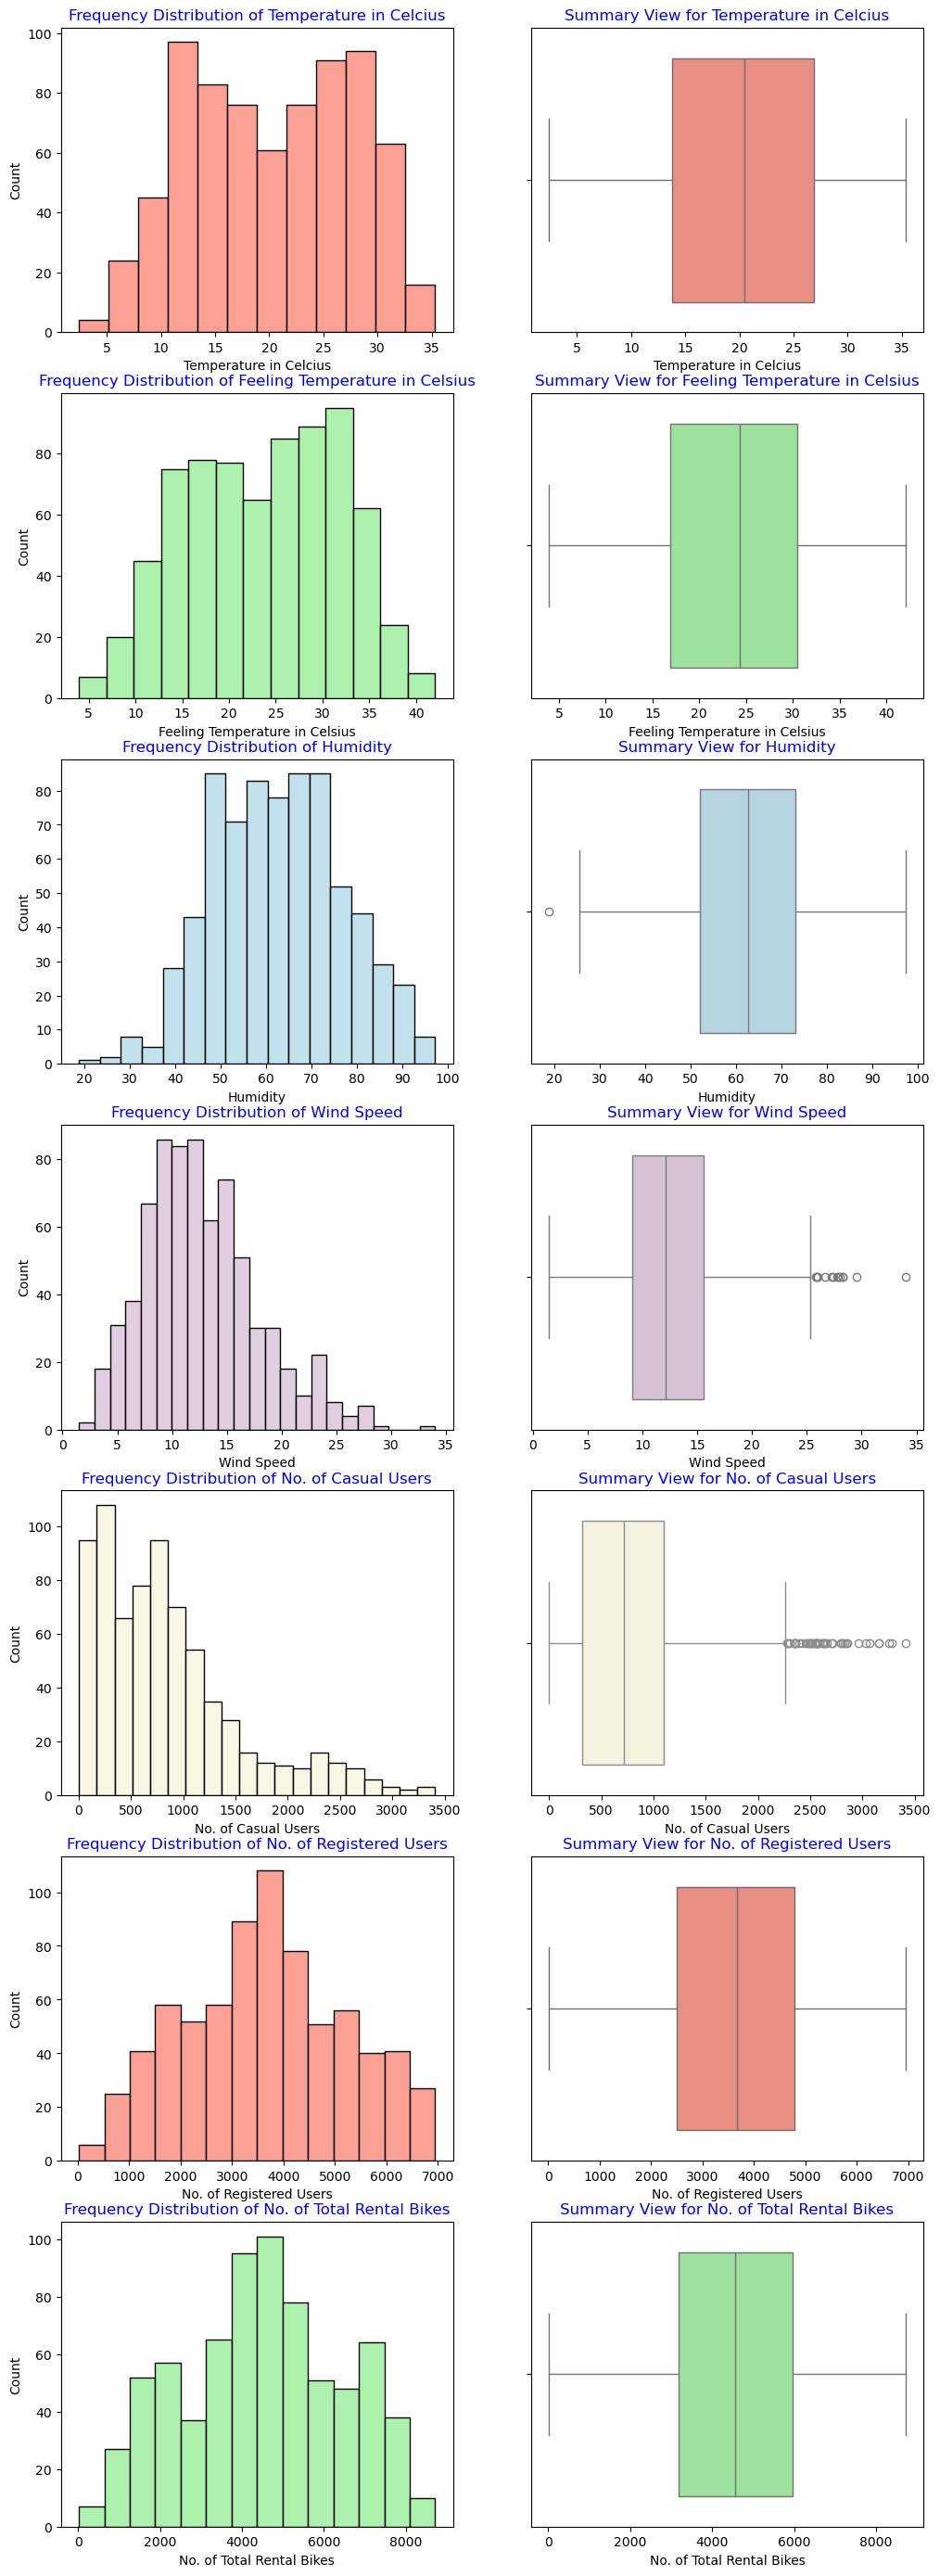

In [23]:
# Plot the graphs for numeric variables
visualize_num_variables(num_vars, num_labels, df_bikes)

In [24]:
# Observations from univariate analysis of Numeric Features:

# 1) The number of days with temperature between 12-15 C and 25-28 C are highest

# 2) Feeling temperature is about 4 C higher than actual temperature

# 3) Most days there are minimum 40 % of humidity prevailing in the air

# 4) Number of causal users seem to follow a left skewed distribution compared to registered users which follow 
#         a more normal distribution around a mean of 3650

In [25]:
# Visualise categorical variables using countplot (univariate analysis)

def visualize_cat_variables (cat_cols, xaxis_labels, df):
    rows = len(cat_cols)//2 + len(cat_cols) % 2
    fix, ax = plt.subplots(rows, 2, figsize=(12,rows*5))
    color_dict = {0:'salmon', 1:'lightgreen', 2:'lightblue', 3:'thistle', 4:'beige'}
    graph_cnt = 0
    for i in cat_cols:
        sns.countplot(data=df, x=i, ax=ax[graph_cnt // 2, graph_cnt % 2], color=color_dict.get(graph_cnt%5))
        ax[graph_cnt // 2, graph_cnt % 2].set_title("Frequency Distribution of " + xaxis_labels[graph_cnt], color='blue')
        ax[graph_cnt // 2, graph_cnt % 2].set(xlabel=xaxis_labels[graph_cnt])
        graph_cnt += 1
    plt.show()

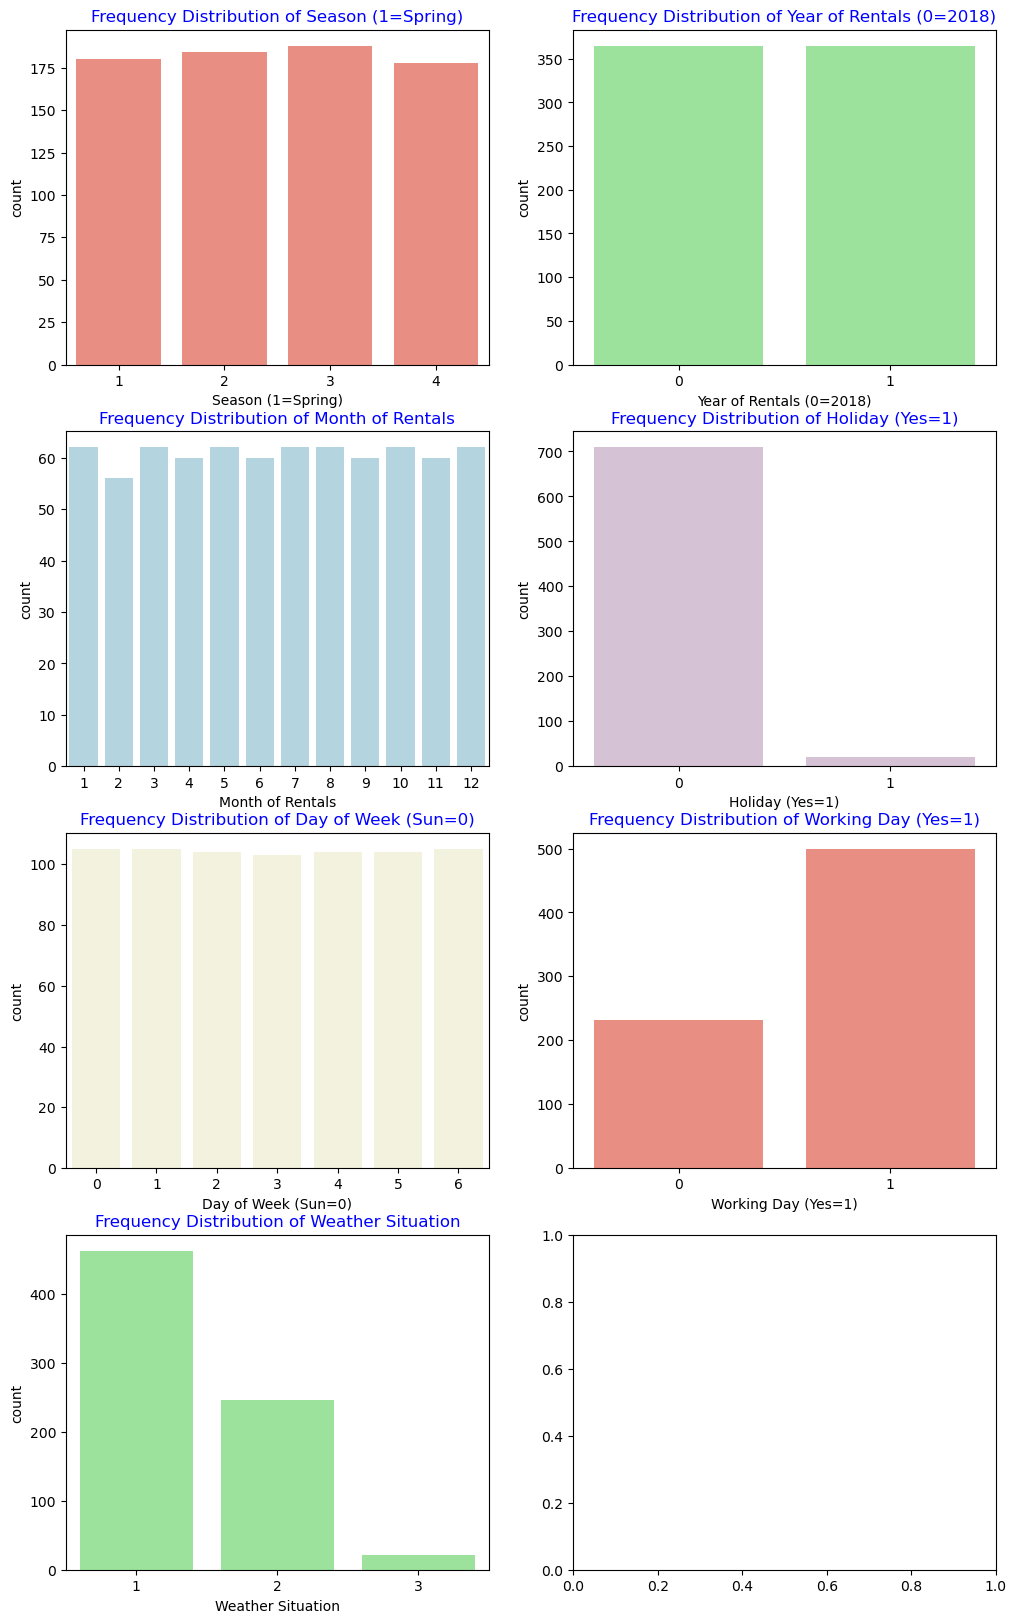

In [26]:
# Plot the graphs for Categorical variables
visualize_cat_variables(cat_vars, cat_labels, df_bikes)

In [27]:
# Observations from univariate analysis of Categorical Features:

# 1) The count of categorical variables reflect the number of days within the data set that come under that category e.g. month, season, day of week etc.

# 2) The weather situations in the subject area is generally amenable to biking with mostly clear or cloudy days. 
#        The number of days with light or heavy rain is very few.

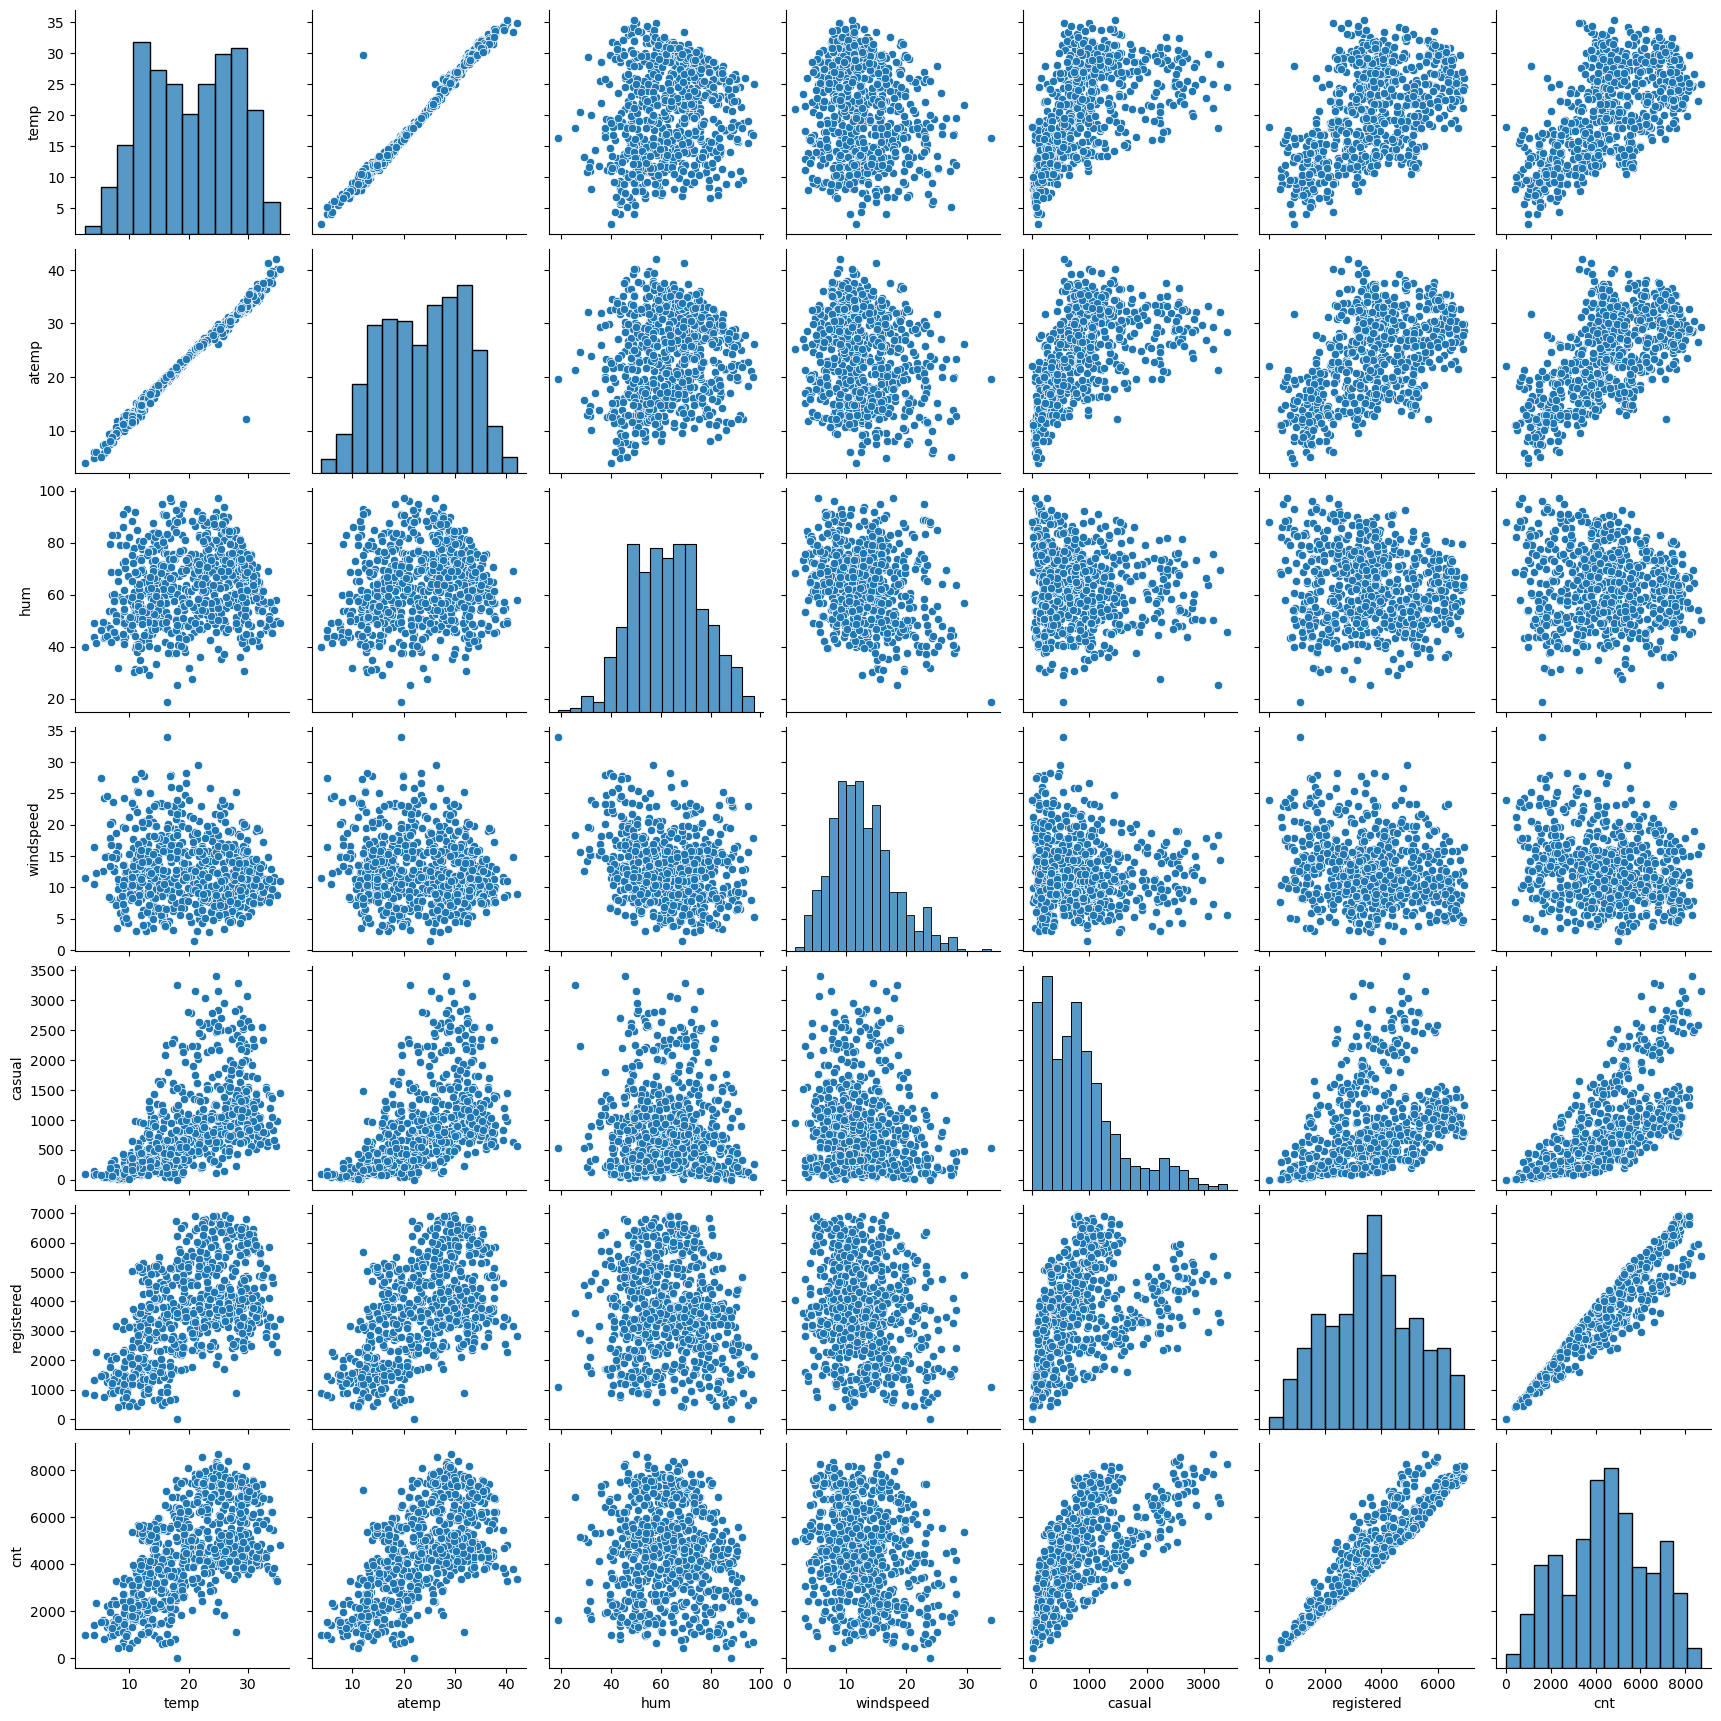

In [28]:
# Visualise all numeric variables in pairwise plots (bivariate analysis)
sns.pairplot(df_bikes[num_vars])
# plt.suptitle("Pair Plot of All Numeric Features")
plt.show()

In [29]:
# Observations from bivariate analysis of Numerical features:

# 1) There is a linear relatioship between actual/ feeling temperature and number of bike rentals

# 2) Humidity and Windspeed don't influence the bike rentals directly

# 3) Rental demands for registered users dominate over casual users

# 4) Casual users seem to venture out more in 20-35 C feeling temperature range

# 5) Actual and Feeling Temperature has high collinearity between them

# 6) Humidity and Windspeed are non-collinear to other features

In [30]:
# Visualise influence of Categorical variables on Target Variable (bivariate analysis)

# Target variables are those which determine bike demands
# Our primary target variable is cnt (Total Daily Rental Bikes)

target_var = 'cnt'

In [31]:
# Define a function to visualize influence of categorical variables on numeric target variable (cnt)
# The method below draws box plot

def bva_num_cat_vars (df, cat_cols, xaxis_labels, target_var, yaxis_label):
    rows = len(cat_cols)//2 + len(cat_cols) % 2
    fig, ax = plt.subplots(rows, 2, figsize=(12,rows*5))
    color_dict = {0:'salmon', 1:'lightgreen', 2:'lightblue', 3:'thistle', 4:'beige'}
    graph_cnt = 0
    for i in cat_cols:
        axis = ax[graph_cnt // 2, graph_cnt % 2]
        sns.boxplot(data=df, x=i, y=target_var, ax=axis, color=color_dict.get(graph_cnt%5))
        # axis.set_title(xaxis_labels[graph_cnt]+" Vs. "+yaxis_label, color='blue')
        axis.set(xlabel=xaxis_labels[graph_cnt], ylabel=yaxis_label)
        graph_cnt += 1
    fig.suptitle("Categorical Features Vs. "+yaxis_label, color='blue', y=0.91)
    plt.show()

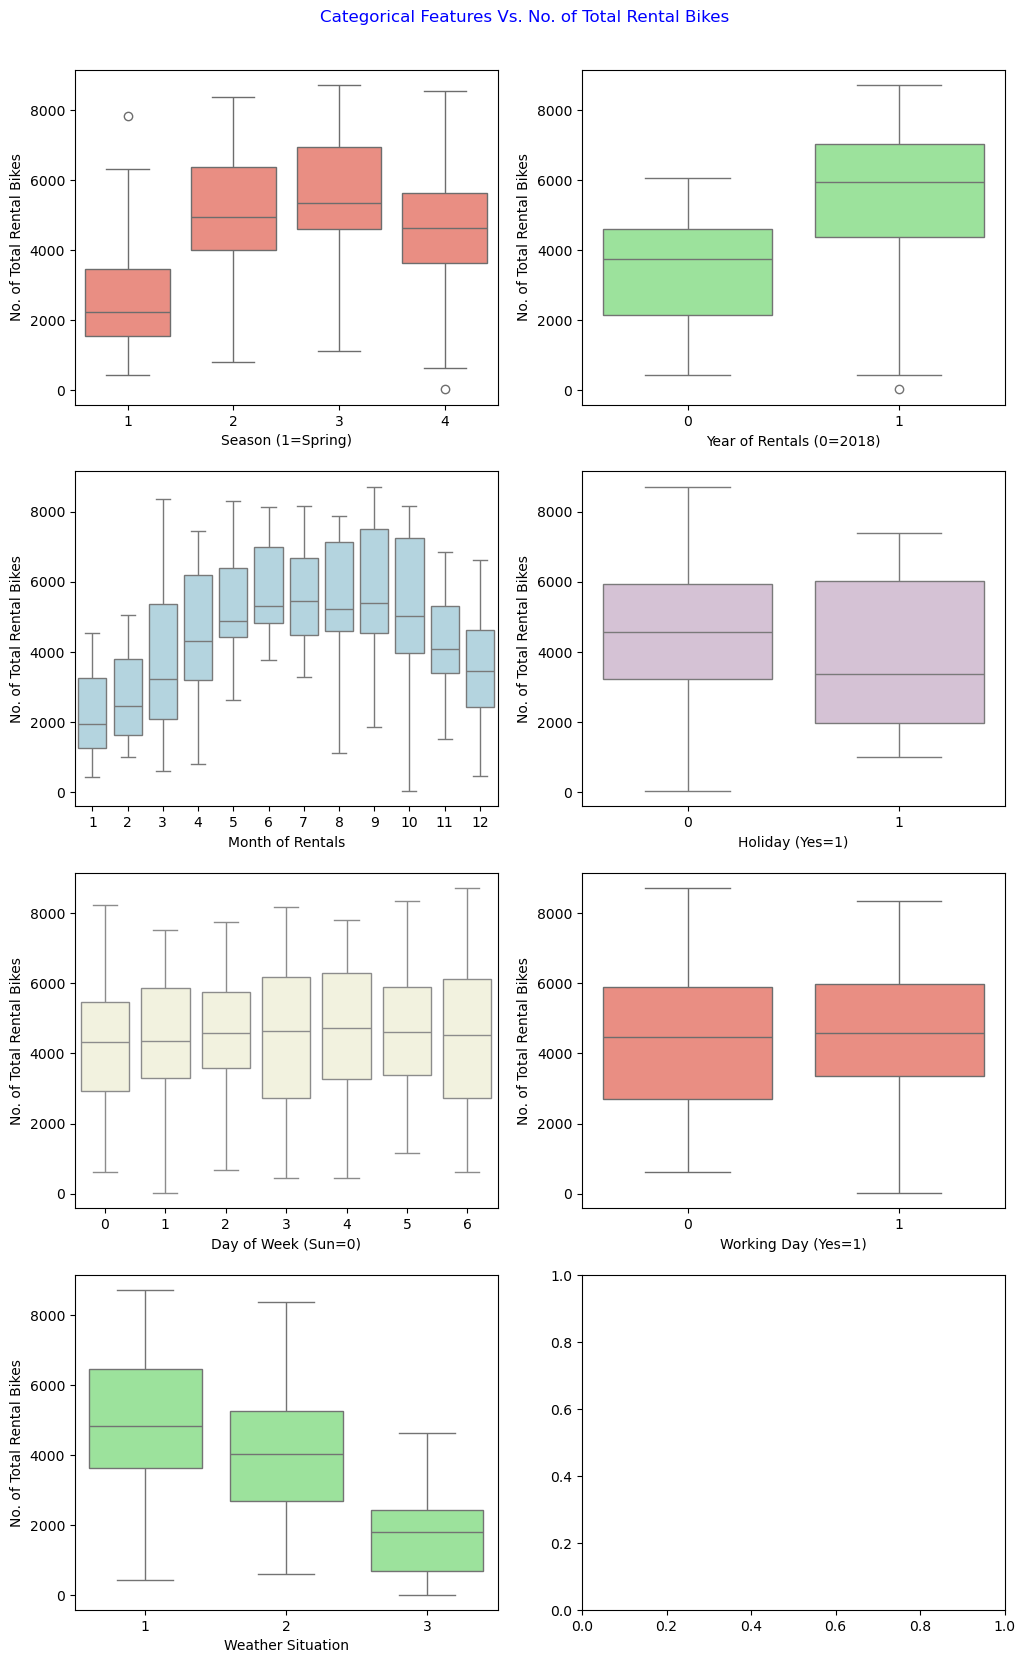

In [32]:
# Draw the boxplots between Categorical & Target Variable
bva_num_cat_vars(df_bikes, cat_vars, cat_labels, target_var, "No. of Total Rental Bikes")

In [33]:
# Observations from bivariate analysis of Categorical features on Bike Rentals:

# 1) Fall & Summer seasons attract more number of users to rent bikes than Spring or Winter

# 2) Year 2019 saw more rentals than 2018 indicating a better awareness and hence usage of the rental facility year on year

# 3) Monthwise, July and Sept saw higher demands while Jan & Feb were lean months

# 4) There are relatively less rentals on holidays than other days

# 5) There were not much variation in demands across days of the week with working days getting slightly higher demands

# 6) Clear days attract more users to rent bikes than other weather situations

# 7) There are no heavy rain or heavy snow days in the subject area

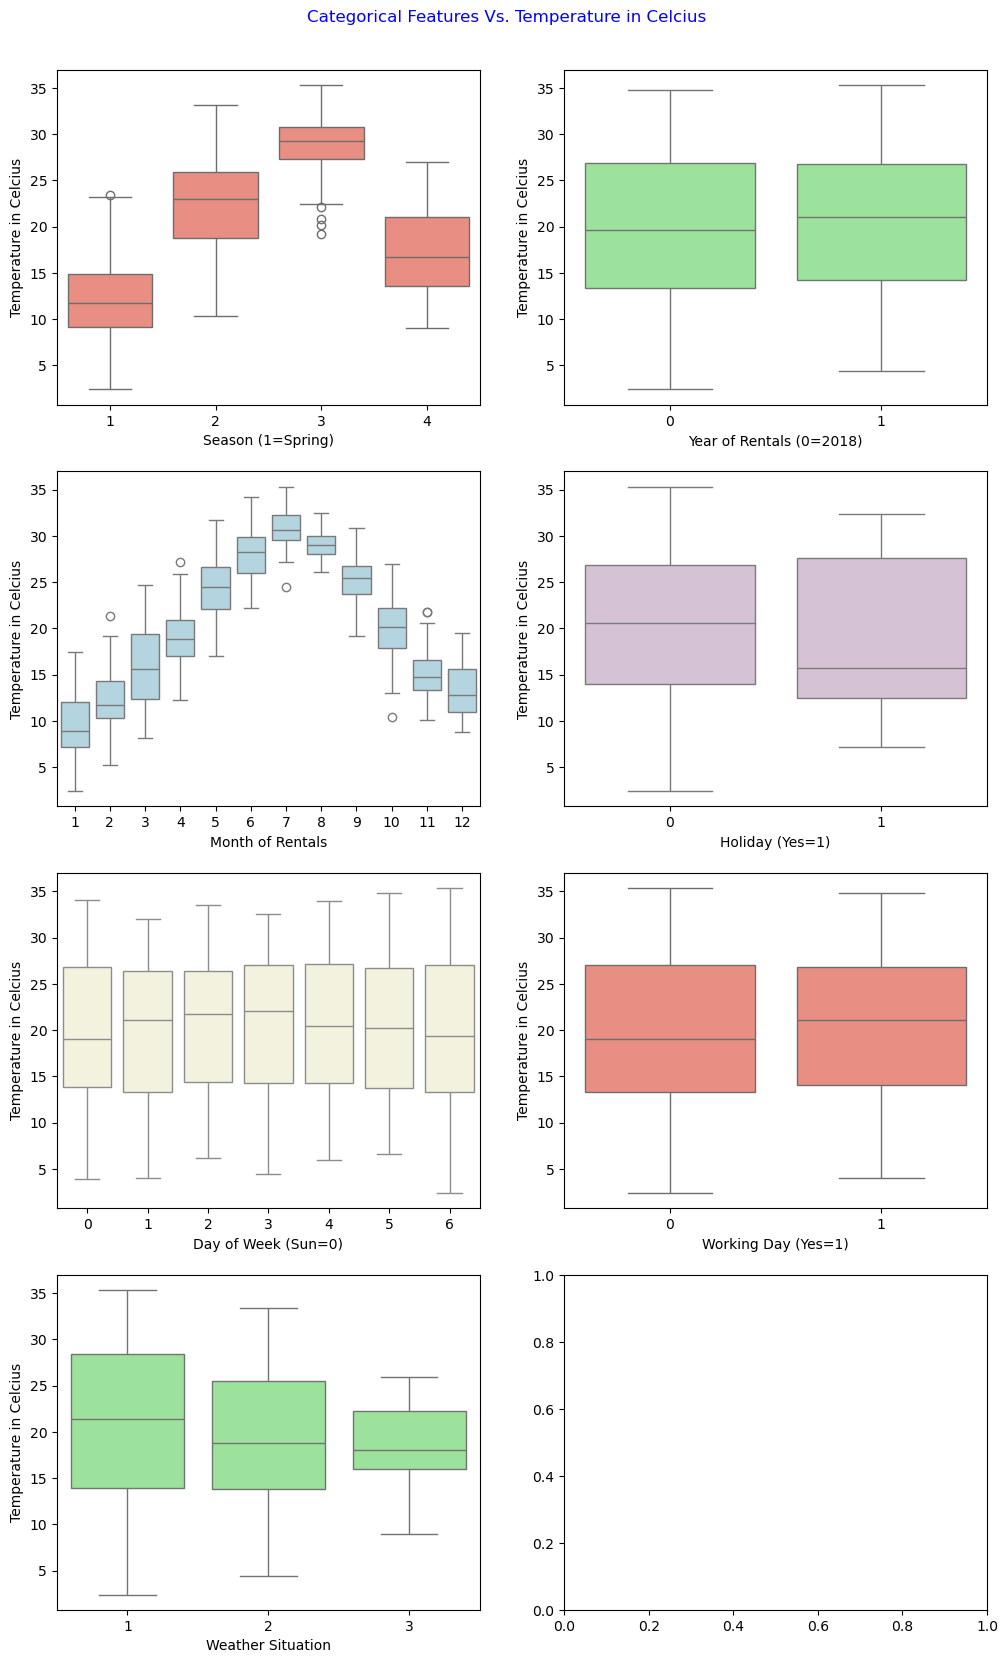

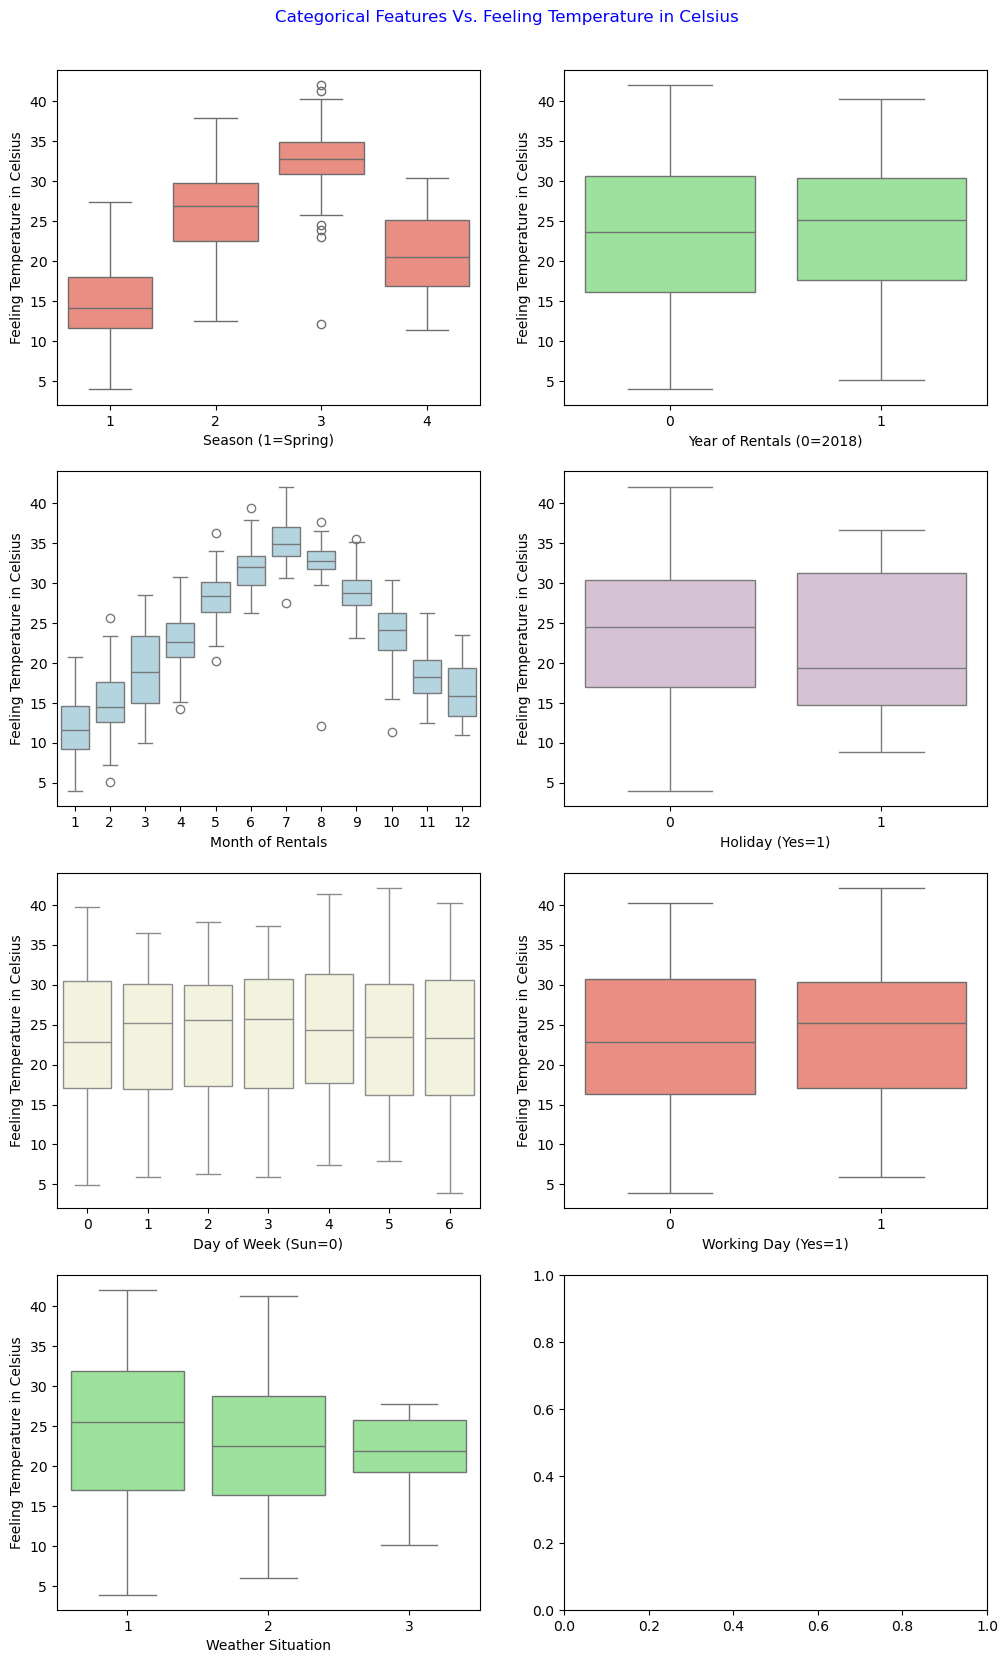

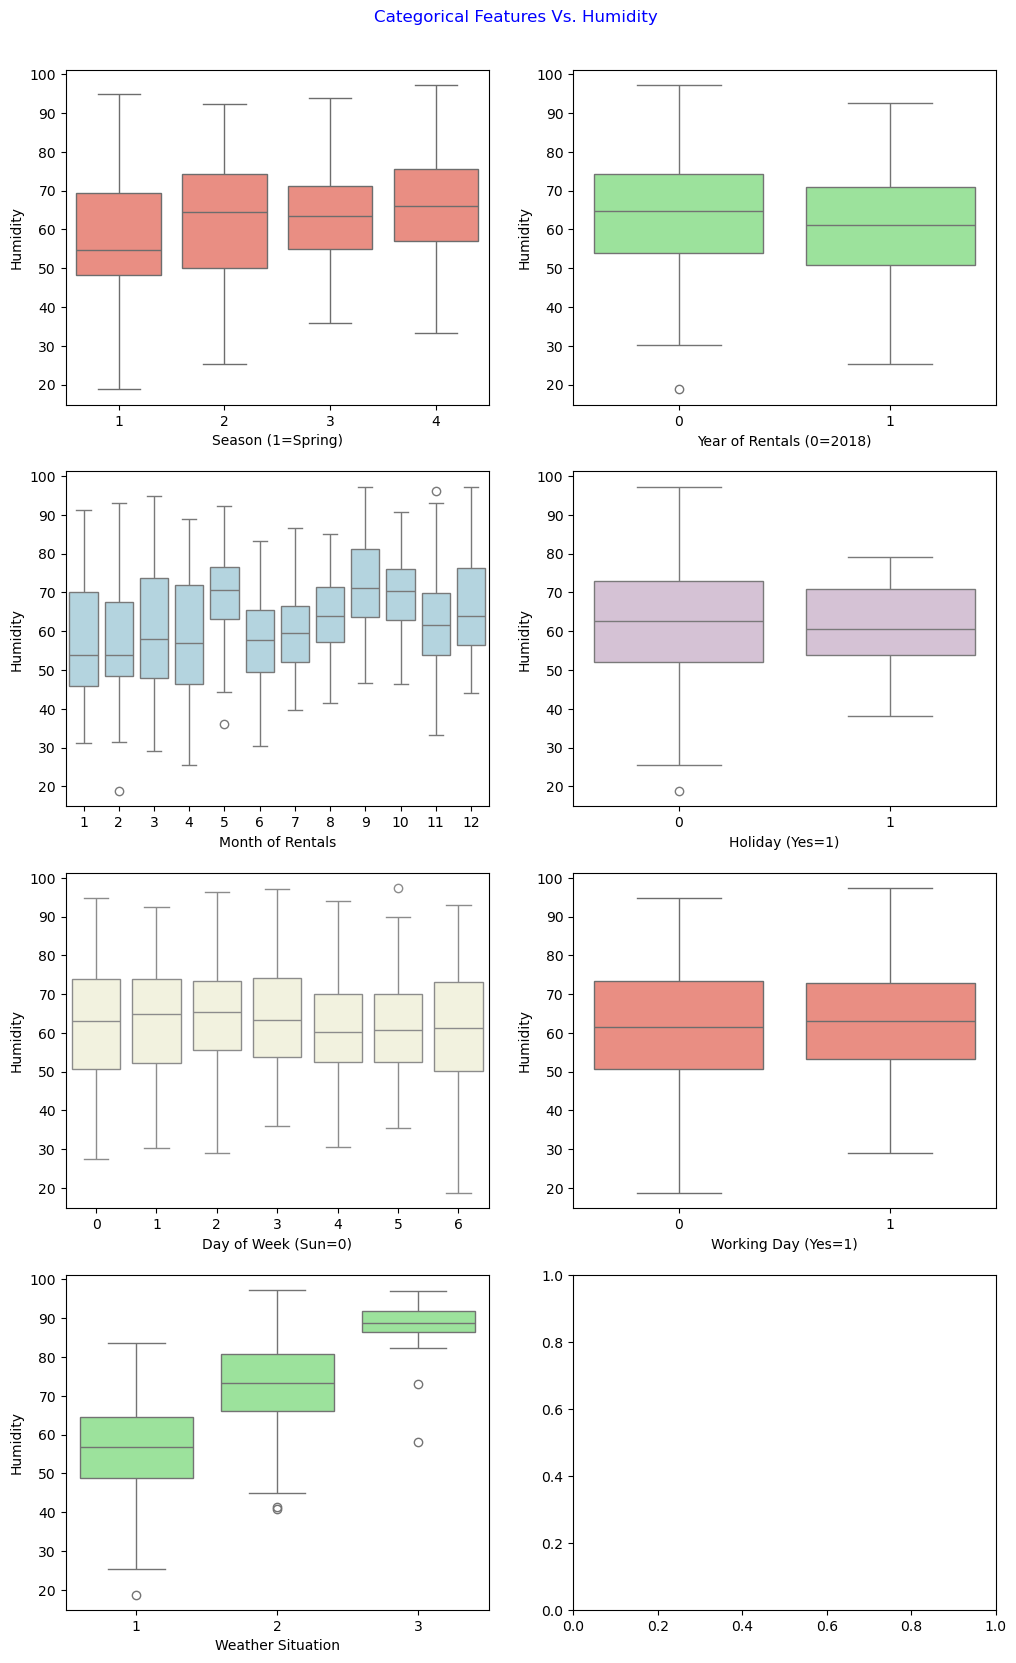

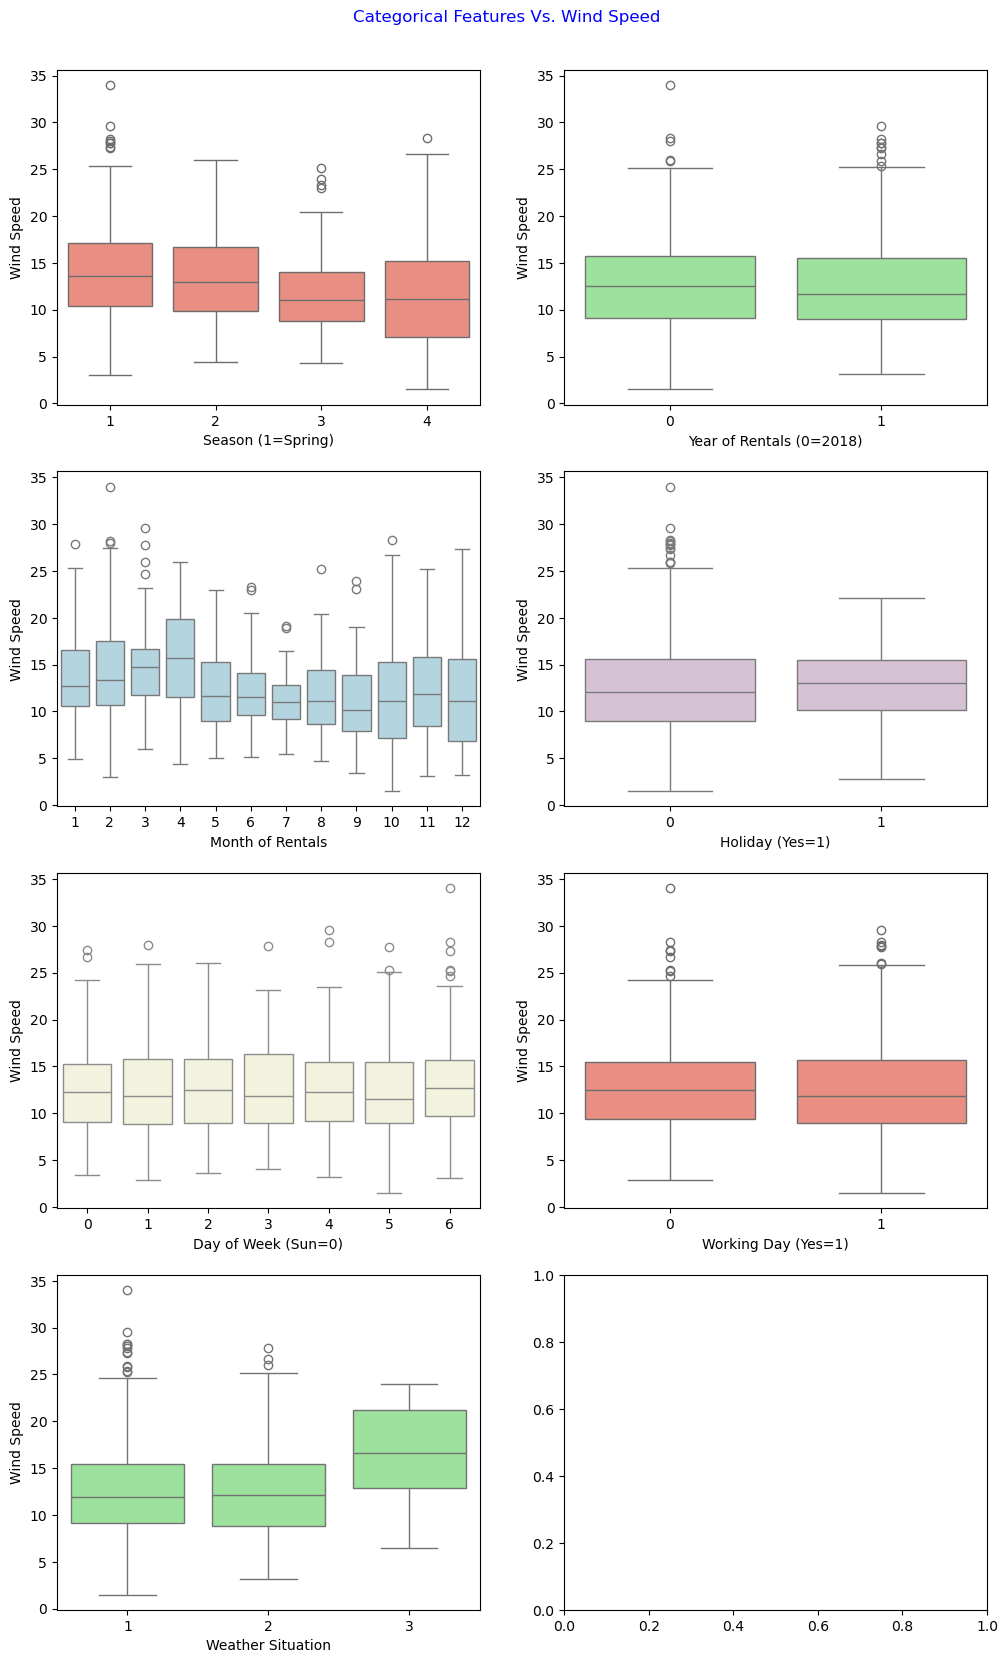

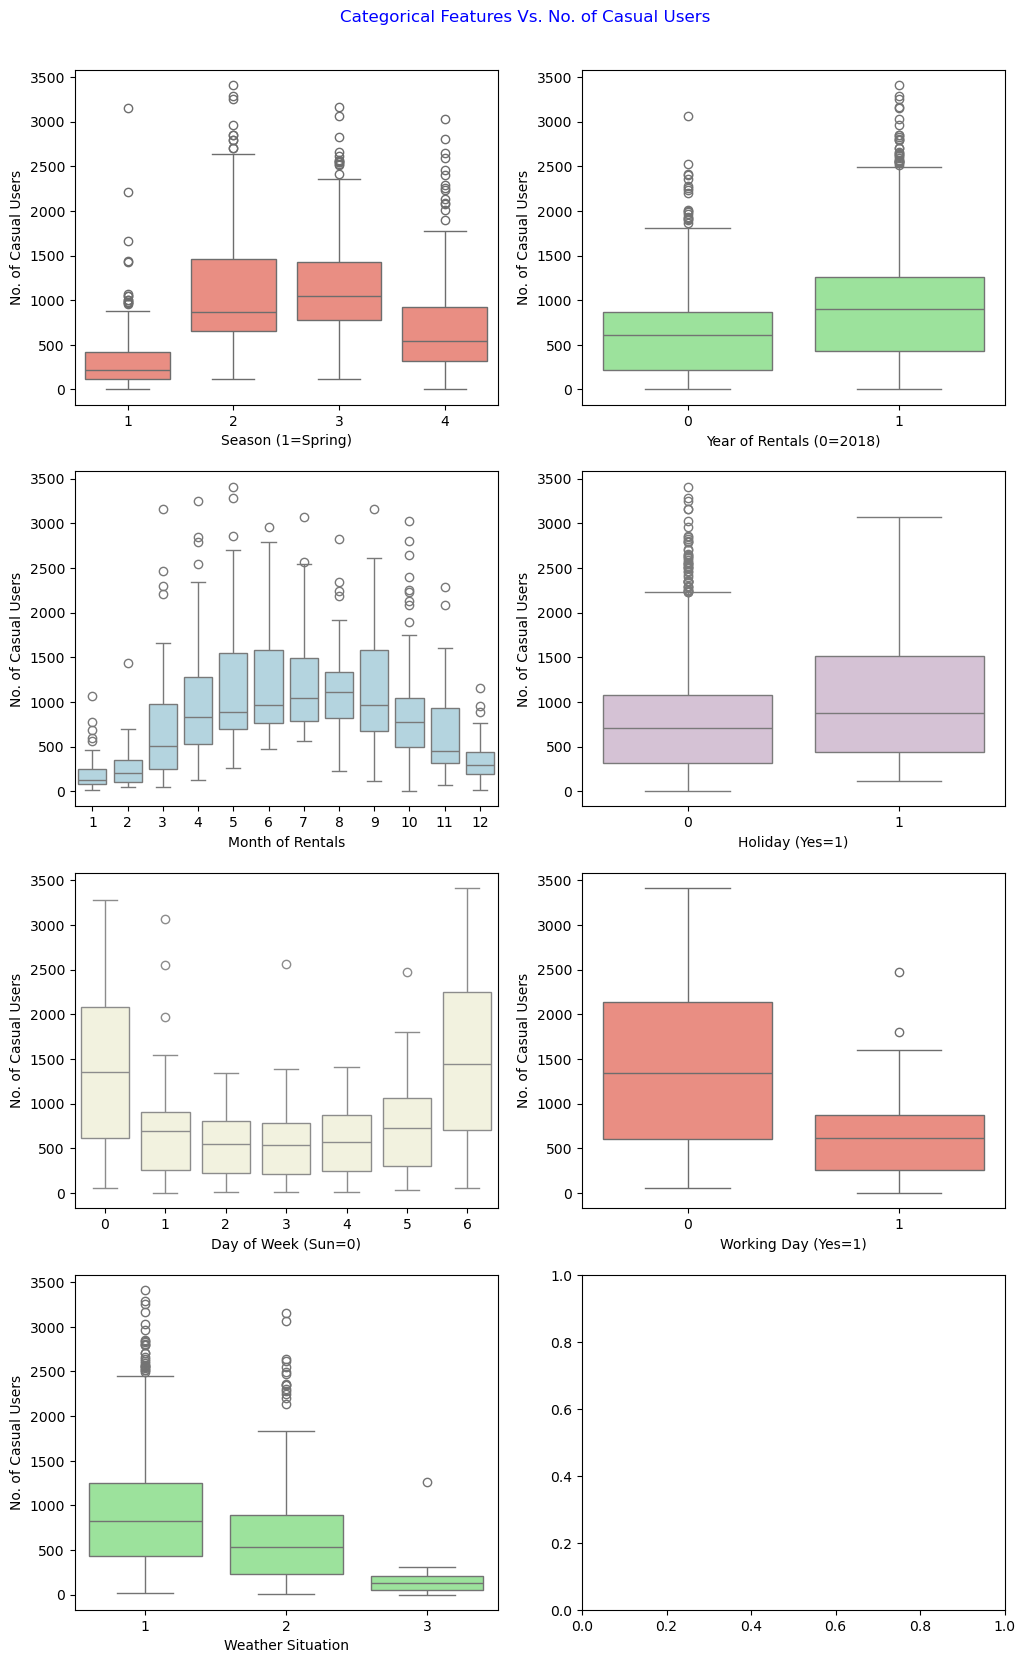

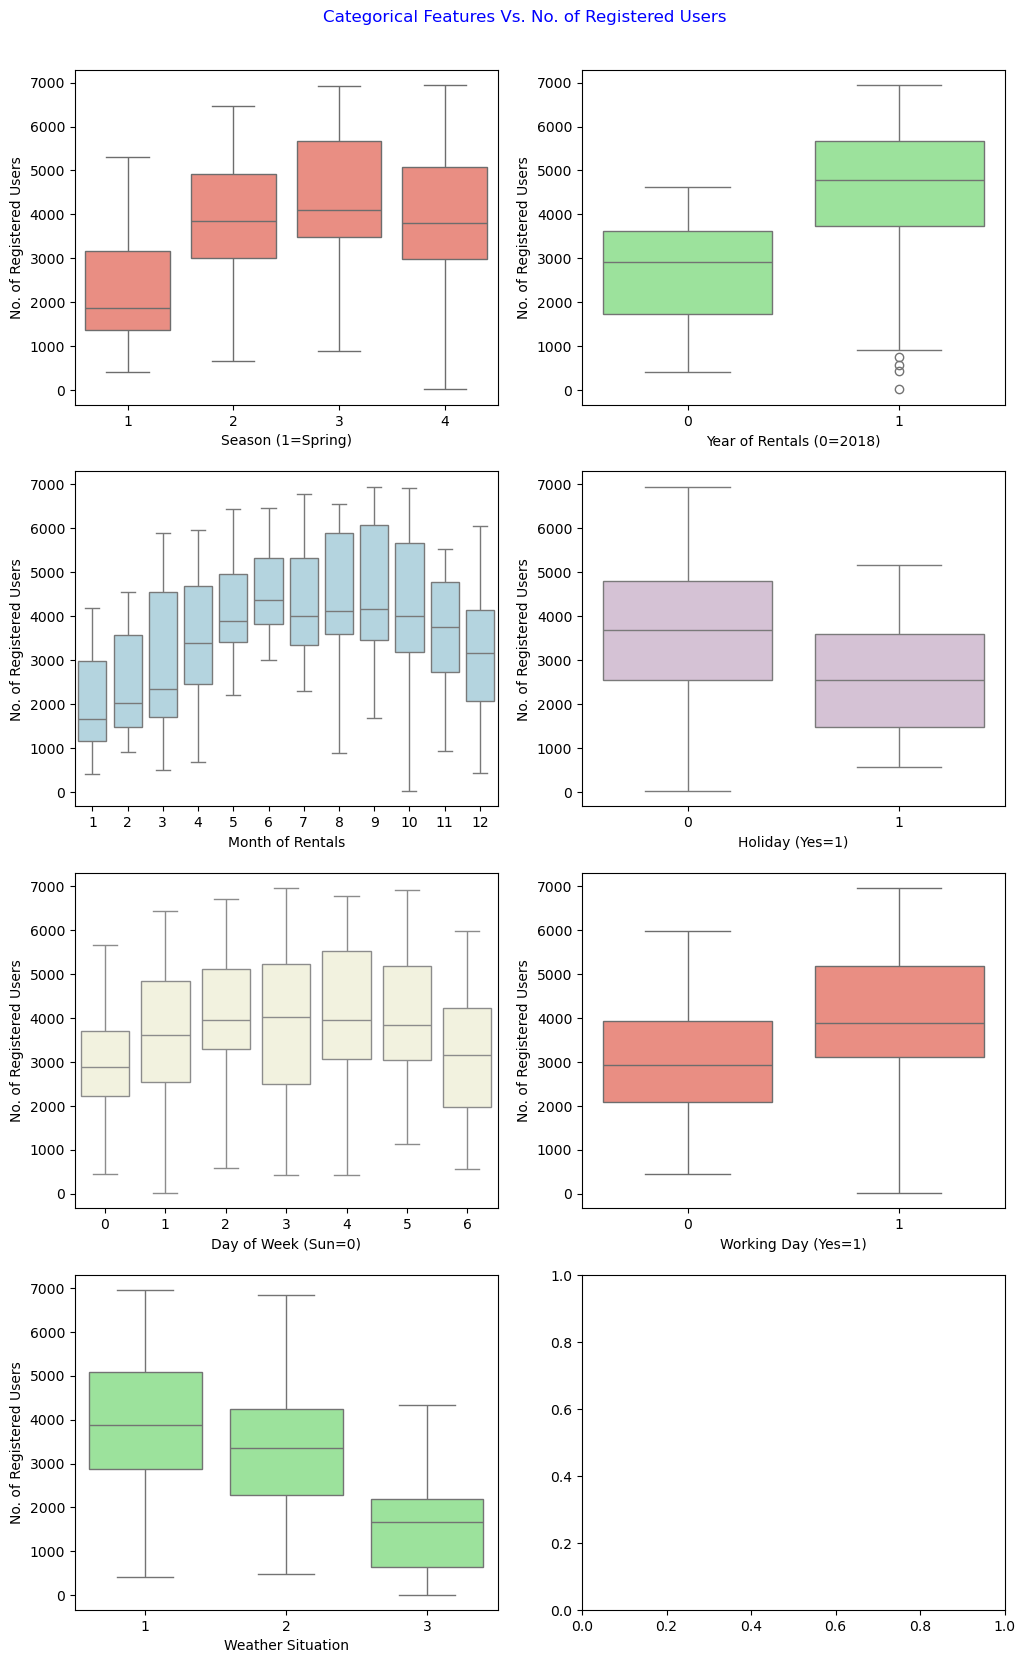

In [34]:
# Draw the boxplots between Categorical & Numeric (other than cnt) Variables

for x in num_vars[:-1]:  #Exclude the target variable - cnt
    bva_num_cat_vars(df_bikes, cat_vars, cat_labels, x, num_labels[num_vars.index(x)])

In [35]:
# Observations from bivariate analysis of effect of Categorical features on other Numeric Features:

# 1) Temperature and Feeling Temperature vary widely across various seasons and months indicating collinear relationship

# 2) Interestingly, temperature is 2 C higher on Working Days

# 3) Temperature falls by about 3 C on Wet days compared to Clear days

# 4) Humidity doesn't vary much across seasons indicating non-collinear relations, but it varies across months

# 5) Humidity is lowest on Clear days and it goes up on Wet and Rainy days

# 6) Windspeed is slightly higher in Mar/ Apr, but otherwise doesn't vary much across months/ seasons

# 7) Windspeed is higher during Rainy days

# 8) Casual as well as Registered Users are higher in Summer and Fall seasons

# 9) Casual Users are higher on Saturdays, Sundays & Holidays (non-working days). It's vice versa for Registered Users

# 10) Demand from Registered Users is more significantly increased on 2019 compared to 2018

# 11) The difference in demand between Clear and Wet days is not significant

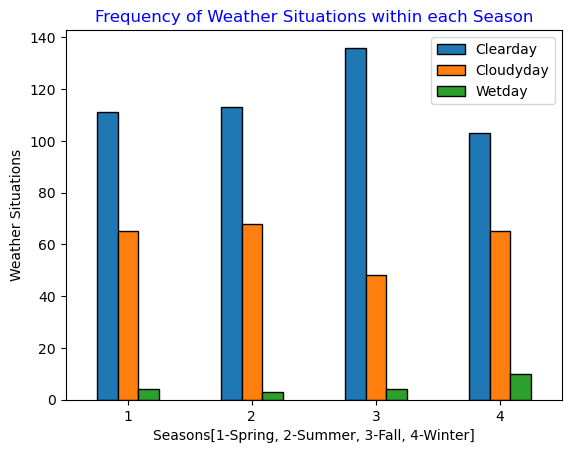

In [36]:
# Draw a bar plot between season and weathersit to see if there exist any pattern

graph_df = (df_bikes
              .groupby(['season'])['weathersit']
              .value_counts(normalize=False)
              .unstack())

graph_df.plot(kind = "bar",
                stacked = False,
                legend = True,
                edgecolor = "black")

# Add title & axis labels
plt.title("Frequency of Weather Situations within each Season", color='blue')
plt.tick_params(labelrotation = 0)
plt.ylabel("Weather Situations")
plt.xlabel("Seasons[1-Spring, 2-Summer, 3-Fall, 4-Winter]")

# Add legend for the graph
plt.legend(labels = ["Clearday", "Cloudyday", "Wetday"])
plt.show()

In [37]:
# Observation from above plot:
# Fall has more amenable wather for bike riding with more clear days and less cloudy/ wet days
# Winter on the other hand has least clear days and more cloudy/ wetdays

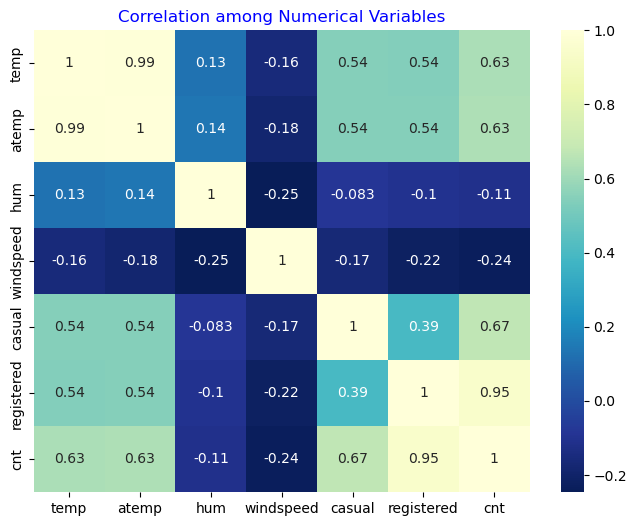

In [38]:
# Create a HeatMap among Numerical Variables to understand correlations among them
plt.figure(figsize=(8, 6))
sns.heatmap(df_bikes[num_vars].corr(),annot=True,cmap="YlGnBu_r")
plt.title("Correlation among Numerical Variables", color='blue')
plt.show()

In [39]:
# Observations from bivariate analysis of Numeric features from Heatmap

# 1) Actual and Feeling Temperatures are highly collinear between them

# 2) Actual and Feeling Temperatures have same correlation with Casual and Registered User demands

# 3) Windspeed brings down humidity and temperature slightly, but it reduces demand as well slightly

# 4) Casual and Registered User demands are weakly correlated between them

# 5) Registered Users have high correlation with Total Bike Demands

#### 1.4 Handle & Transform (Create Dummies) Categorical Variables

In [41]:
# Transform the Categorical features as required to enable those to be handled by the model appropriately
# cat_vars = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']
# These variables are already in two levels (0/1) and don't need any further transformation - yr, holiday, workingday
# mnth and weekday features are having an ordinality which is reflected through 1-12 / 0-6 coding i.e. Mar(3) comes after Feb(2). 
      # Hence we can retain the existing encoding
# weathersit feature is encoded with ordinal values, but there is no real life sequencing among the values, since a specific weather situation 
      # can occur on any day of the year. Hence weathersit needs to be converted to dummy variables
# season feature is encoded with ordinal values, but season 1 (Spring) spans to 1st as well as last month of the year. 
      # Hence season needs to be converted to dummy variables

In [42]:
# Check the span of seasons across months
df_bikes[['season', 'mnth']].groupby(['season', 'mnth']).count()

Empty DataFrame
Columns: []
Index: [(1, 1), (1, 2), (1, 3), (1, 12), (2, 3), (2, 4), (2, 5), (2, 6), (3, 6), (3, 7), (3, 8), (3, 9), (4, 9), (4, 10), (4, 11), (4, 12)]

In [43]:
# Convert weathersit to dummy variables
# Convert weathersit to string categories first to get meaningful names for the dummy variables
# Categories to be used are: 1 - Clearday; 2 - Cloudyday; 3 - Wetday; 4 - Rainyday

# Map the ordinal values to string values
df_bikes.weathersit = df_bikes.weathersit.map({1: "Clearday", 2: "Cloudyday", 3: "Wetday", 4: "Rainyday"})

In [44]:
# Create the dummy variables for weathersit
weather = pd.get_dummies(df_bikes.weathersit, drop_first=True)
weather.head()

,Cloudyday,Wetday
0,True,False
1,True,False
2,False,False
3,False,False
4,False,False


In [45]:
# Concatenate weather to main df

df_bikes = pd.concat([df_bikes, weather], axis=1)

# drop weathersit variable
df_bikes.drop(['weathersit'], axis = 1, inplace = True)

In [46]:
df_bikes.head(3)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,Cloudyday,Wetday
0,1,01-01-2018,1,0,1,0,6,0,14.110847,18.18125,80.5833,10.749882,331,654,985,True,False
1,2,02-01-2018,1,0,1,0,0,0,14.902598,17.68695,69.6087,16.652113,131,670,801,True,False
2,3,03-01-2018,1,0,1,0,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,False,False


In [47]:
# Convert season to dummy variables
# Convert season to string categories first to get meaningful names for the dummy variables
# Categories to be used are: 1 - Spring; 2 - Summer; 3 - Fall; 4 - Winter

# Map the ordinal values to string values
df_bikes.season = df_bikes.season.map({1: "Spring", 2: "Summer", 3: "Fall", 4: "Winter"})

In [48]:
# Create the dummy variables for season
season = pd.get_dummies(df_bikes.season, drop_first=True)
season.head()

,Spring,Summer,Winter
0,True,False,False
1,True,False,False
2,True,False,False
3,True,False,False
4,True,False,False


In [49]:
# Concatenate season to main df

df_bikes = pd.concat([df_bikes, season], axis=1)

# drop season variable
df_bikes.drop(['season'], axis = 1, inplace = True)

In [50]:
df_bikes.head(3)

,instant,dteday,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,Cloudyday,Wetday,Spring,Summer,Winter
0,1,01-01-2018,0,1,0,6,0,14.110847,18.18125,80.5833,10.749882,331,654,985,True,False,True,False,False
1,2,02-01-2018,0,1,0,0,0,14.902598,17.68695,69.6087,16.652113,131,670,801,True,False,True,False,False
2,3,03-01-2018,0,1,0,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,False,False,True,False,False


#### 1.5 Derive New Metrics & Analyse

In [52]:
# Let's explore if any combination of existing features accentuate the rental demand

# Create a function to draw scatter plot between two variables

def draw_scatter (x_var, x_label, y_var, y_label, title):
    fig = plt.figure(figsize=(5,4))
    plt.scatter(x_var, y_var)
    fig.suptitle(title, fontsize = 14, color='blue')              
    plt.xlabel(x_label, fontsize = 12)      
    plt.ylabel(y_label, fontsize = 12)
    plt.show()

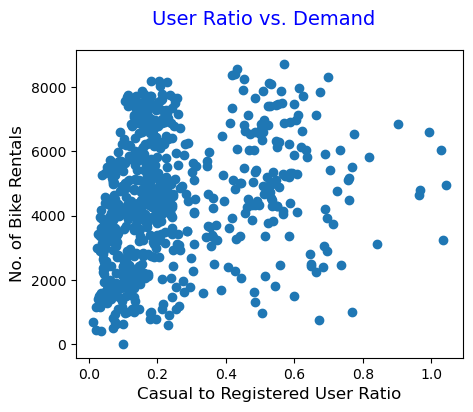

In [53]:
# Check casual to registered users ratio vs. rental demand

df_bikes['userratio'] = df_bikes['casual']/df_bikes['registered']

draw_scatter(df_bikes['userratio'], 'Casual to Registered User Ratio', df_bikes['cnt'], 'No. of Bike Rentals', 'User Ratio vs. Demand')

In [54]:
# Observation:
# There is no marked relationship between User Ratio and Demand

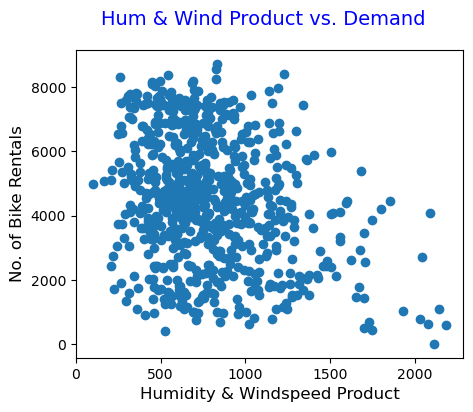

In [55]:
# Check product of hum & windspeed vs. rental demand

df_bikes['humwindprod'] = df_bikes['hum']* df_bikes['windspeed']

draw_scatter(df_bikes['humwindprod'], 'Humidity & Windspeed Product', df_bikes['cnt'], 'No. of Bike Rentals', 'Hum & Wind Product vs. Demand')

In [56]:
# Observation:
# There is no linear relationship between humwindprod and Demand

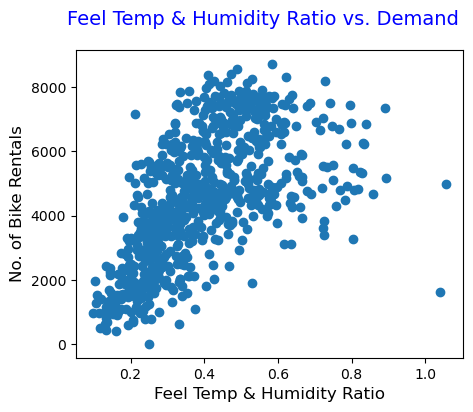

In [57]:
# Check ratio of atemp & hum vs. rental demand

df_bikes['atemphumratio'] = df_bikes['atemp']/ df_bikes['hum']

draw_scatter(df_bikes['atemphumratio'], 'Feel Temp & Humidity Ratio', df_bikes['cnt'], 'No. of Bike Rentals', 'Feel Temp & Humidity Ratio vs. Demand')

In [58]:
# Check for correlation between the derived metric and Demand
df_bikes[['atemphumratio', 'cnt']].corr()

,atemphumratio,cnt
atemphumratio,1.000000,0.590541
cnt,0.590541,1.000000


In [59]:
# Observation:
# There is some correlationship between atemphumratio and Demand. This can be used for modelling

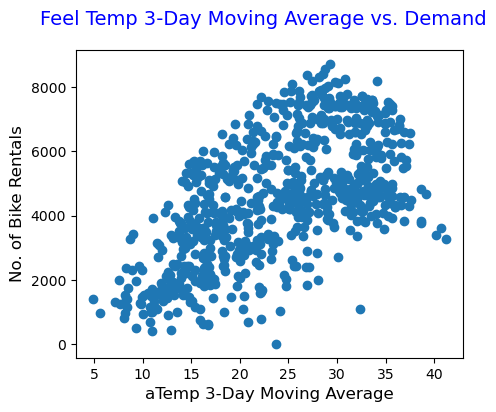

In [60]:
# Compute 3-day moving average of atemp variable and check its impact on demand

df_bikes['mvatemp'] = df_bikes['atemp'].rolling(window=3).mean()

draw_scatter(df_bikes['mvatemp'], 'aTemp 3-Day Moving Average', df_bikes['cnt'], 'No. of Bike Rentals', \
             'Feel Temp 3-Day Moving Average vs. Demand')

In [61]:
# Check for correlation between the derived metric and Demand
df_bikes[['mvatemp', 'cnt']].corr()

,mvatemp,cnt
mvatemp,1.000000,0.612794
cnt,0.612794,1.000000


In [62]:
# Observation:
# Since aTemp itself has a correlation coef of 0.63 with Demand, which is more than aTemp 3-Day moving average, this metric can be dropped

#### 1.6 Prepare Clean Data for Modelling

In [64]:
# We are ready to move into modelling phase. We need to drop unnecessary variables to prepare a clean data set

df_bikes.head(2)

,instant,dteday,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,...,cnt,Cloudyday,Wetday,Spring,Summer,Winter,userratio,humwindprod,atemphumratio,mvatemp
0,1,01-01-2018,0,1,0,6,0,14.110847,18.18125,80.5833,...,985,True,False,True,False,False,0.506116,866.260966,0.225621,NaN
1,2,02-01-2018,0,1,0,0,0,14.902598,17.68695,69.6087,...,801,True,False,True,False,False,0.195522,1159.131938,0.254091,NaN


In [65]:
# Drop the extra variables

df_demand_model = df_bikes.drop(extra_vars, axis=1)

In [66]:
# Drop the derived variables which will not be used for modelling

df_demand_model = df_demand_model.drop(['userratio', 'humwindprod', 'mvatemp'], axis=1)

In [67]:
# Drop casual and registered variables as those are included in the target (cnt) variable already

df_demand_model = df_demand_model.drop(['casual', 'registered'], axis=1)

In [68]:
# Check if there are any missing values in the model dataset

df_demand_model.isnull().sum()

yr               0
mnth             0
holiday          0
weekday          0
workingday       0
temp             0
atemp            0
hum              0
windspeed        0
cnt              0
Cloudyday        0
Wetday           0
Spring           0
Summer           0
Winter           0
atemphumratio    0
dtype: int64

In [69]:
df_demand_model.head(2)

,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,Cloudyday,Wetday,Spring,Summer,Winter,atemphumratio
0,0,1,0,6,0,14.110847,18.18125,80.5833,10.749882,985,True,False,True,False,False,0.225621
1,0,1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,True,False,True,False,False,0.254091


### 2. Build Model

In [71]:
# Import all model building related libraries

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Import RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

from sklearn.metrics import r2_score

#### 2.1 Build Initial Model & Analyse Performance

In [73]:
# Split the data set for training and validation in 70:30 ratio

np.random.seed(0)
df_train, df_test = train_test_split(df_demand_model, train_size = 0.7, test_size = 0.3, random_state = 100)

In [74]:
# Scale the feature variables except those with yes-no levels and dummy variables which are already in scaled state

scaler = MinMaxScaler()

rev_num_var = ['mnth', 'weekday', 'temp', 'atemp', 'hum', 'windspeed', 'cnt', 'Cloudyday', 'Wetday', 'Spring', 'Summer', 'Winter', 'atemphumratio']

df_train[rev_num_var] = scaler.fit_transform(df_train[rev_num_var])

In [75]:
df_train.head(5)

,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,Cloudyday,Wetday,Spring,Summer,Winter,atemphumratio
653,1,0.818182,0,0.333333,1,0.509887,0.501133,0.473375,0.300794,0.864243,0.0,0.0,0.0,0.0,1.0,0.332977
576,1,0.545455,0,0.333333,1,0.815169,0.766351,0.659744,0.264686,0.827658,0.0,0.0,0.0,0.0,0.0,0.394506
426,1,0.181818,0,1.000000,0,0.442393,0.438975,0.553780,0.255342,0.465255,1.0,0.0,1.0,0.0,0.0,0.248202
728,1,1.000000,0,0.000000,0,0.245101,0.200348,0.377528,0.663106,0.204096,0.0,0.0,1.0,0.0,0.0,0.149432
482,1,0.272727,0,1.000000,0,0.395666,0.391735,0.385516,0.188475,0.482973,1.0,0.0,0.0,1.0,0.0,0.304161


In [76]:
# Check if all the variables have been scaled between 0 and 1
df_train.describe()

,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,Cloudyday,Wetday,Spring,Summer,Winter,atemphumratio
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,510.000000
mean,0.507843,0.504456,0.025490,0.498366,0.676471,0.537262,0.512989,0.567859,0.320768,0.513620,0.343137,0.029412,0.243137,0.245098,0.24902,0.304035
std,0.500429,0.315338,0.157763,0.336182,0.468282,0.225844,0.212385,0.177366,0.169797,0.224593,0.475223,0.169124,0.429398,0.430568,0.43287,0.163695
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,0.000000,0.181818,0.000000,0.166667,0.000000,0.339853,0.332086,0.428913,0.199179,0.356420,0.000000,0.000000,0.000000,0.000000,0.00000,0.179249
50%,1.000000,0.545455,0.000000,0.500000,1.000000,0.540519,0.526811,0.570553,0.296763,0.518638,0.000000,0.000000,0.000000,0.000000,0.00000,0.282653
75%,1.000000,0.818182,0.000000,0.833333,1.000000,0.735215,0.688457,0.695953,0.414447,0.684710,1.000000,0.000000,0.000000,0.000000,0.00000,0.404210
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000


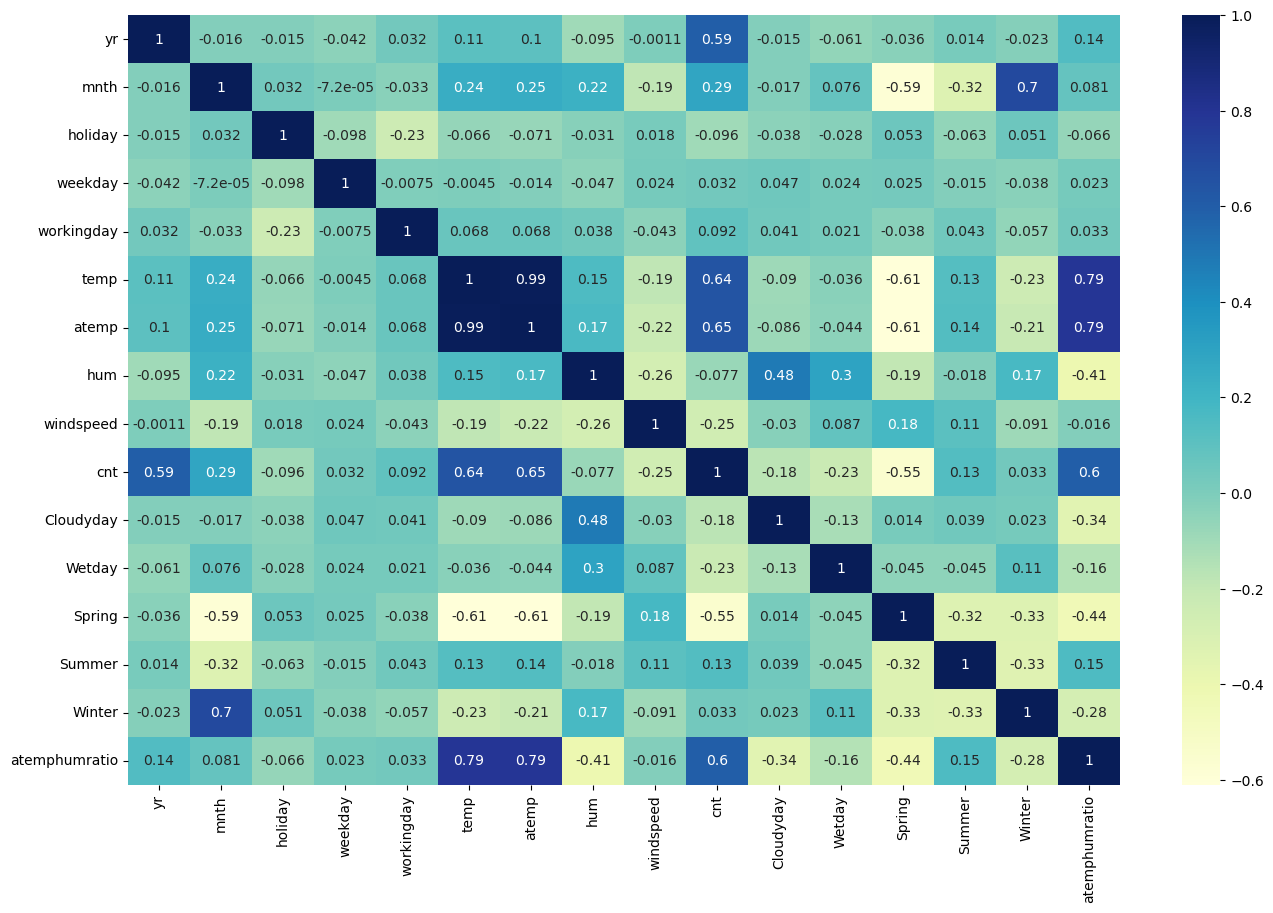

In [77]:
# Check the Heatmap among the model variables to identify variable with maximum correlation with target variable

plt.figure(figsize = (16, 10))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [78]:
# Define a function to build LR model based on input train dataframe and y-variable

def buildLRModel (X_train, y_train, y_var, x_vars):
    # Add a constant
    X_train_lm = sm.add_constant(X_train[x_vars])

    # Create the fitted model
    return sm.OLS(y_train, X_train_lm).fit()

In [79]:
# Divide the training set between X and y sets for model building
y_train = df_train.pop('cnt')
X_train = df_train

In [80]:
# Build the initial model with atemp as independent variable since it has the max correlation with cnt

# Create a first fitted model
demand_model_0 = buildLRModel(X_train, y_train, 'cnt', ['atemp'])

# Check the parameters of the model
demand_model_0.params

const    0.162924
atemp    0.683633
dtype: float64

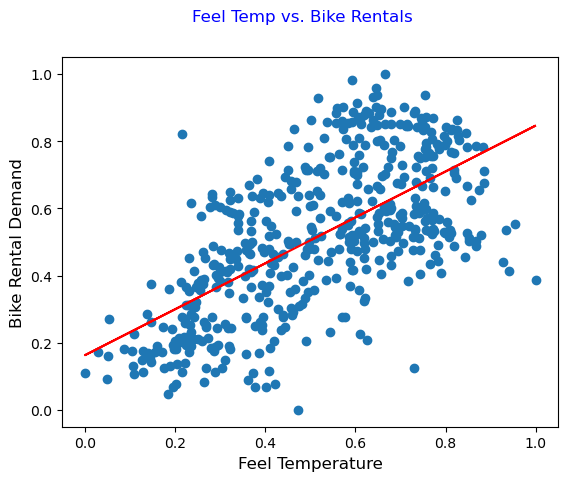

In [81]:
# Visualise the data with a scatter plot and the fitted regression line
plt.scatter(X_train['atemp'], y_train)
plt.plot(X_train['atemp'], demand_model_0.params.const + demand_model_0.params.atemp*X_train['atemp'], 'r')
plt.suptitle("Feel Temp vs. Bike Rentals", color='blue')
plt.xlabel('Feel Temperature', fontsize = 12)
plt.ylabel('Bike Rental Demand', fontsize = 12)
plt.show()

In [82]:
# Review the summary of the linear regression model obtained
print(demand_model_0.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.418
Model:                            OLS   Adj. R-squared:                  0.417
Method:                 Least Squares   F-statistic:                     364.7
Date:                Sun, 23 Jun 2024   Prob (F-statistic):           1.10e-61
Time:                        12:39:36   Log-Likelihood:                 176.51
No. Observations:                 510   AIC:                            -349.0
Df Residuals:                     508   BIC:                            -340.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1629      0.020      8.199      0.0

#### 2.2 Finetune Model by Adding Features using Variable Selection Process

In [84]:
# We will now add more variables to the model to improve accuracy

# Create next fitted model by adding yr feature
demand_model_1 = buildLRModel(X_train, y_train, 'cnt', ['atemp', 'yr'])

# Check the summary of the model
print(demand_model_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.696
Model:                            OLS   Adj. R-squared:                  0.694
Method:                 Least Squares   F-statistic:                     579.5
Date:                Sun, 23 Jun 2024   Prob (F-statistic):          1.07e-131
Time:                        12:39:36   Log-Likelihood:                 341.87
No. Observations:                 510   AIC:                            -677.7
Df Residuals:                     507   BIC:                            -665.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0721      0.015      4.810      0.0

In [85]:
# Observations:
# The R-squared value has been improved significantly, we can keep yr variable in the model
# All the parameters have very low p-value, hence they are individually significant
# The probability (F-statistic) is close to zero. Hence the overall model is significant

In [86]:
# Create next fitted model by adding Spring feature
demand_model_2 = buildLRModel(X_train, y_train, 'cnt', ['atemp', 'yr', 'Spring'])

# Check the summary of the model
print(demand_model_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.739
Method:                 Least Squares   F-statistic:                     482.6
Date:                Sun, 23 Jun 2024   Prob (F-statistic):          5.58e-148
Time:                        12:39:36   Log-Likelihood:                 383.02
No. Observations:                 510   AIC:                            -758.0
Df Residuals:                     506   BIC:                            -741.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1942      0.019     10.238      0.0

In [87]:
# Create next fitted model by adding Summer feature
demand_model_3 = buildLRModel(X_train, y_train, 'cnt', ['atemp', 'yr', 'Spring', 'Summer'])

# Check the summary of the model
print(demand_model_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.739
Method:                 Least Squares   F-statistic:                     361.9
Date:                Sun, 23 Jun 2024   Prob (F-statistic):          9.39e-147
Time:                        12:39:36   Log-Likelihood:                 383.37
No. Observations:                 510   AIC:                            -756.7
Df Residuals:                     505   BIC:                            -735.6
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1988      0.020     10.066      0.0

In [88]:
# demand_model_3 Observations:
# The R-squared value has NOT been improved
# Summer parameter has very high p-value, hence it is NOT individually significant. We can drop Summer variable from the model
# The probability (F-statistic) is close to zero. Hence the overall model is still significant

In [89]:
# Now we will add all the independent variables to the model

# Check the columns in X-train dataframe to ensure all the variables are present
X_train.columns

Index(['yr', 'mnth', 'holiday', 'weekday', 'workingday', 'temp', 'atemp',
       'hum', 'windspeed', 'Cloudyday', 'Wetday', 'Spring', 'Summer', 'Winter',
       'atemphumratio'],
      dtype='object')

In [90]:
# Create the next model with all the features

demand_model_4 = buildLRModel(X_train, y_train, 'cnt', X_train.columns)

# Check the summary of the model
print(demand_model_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     166.1
Date:                Sun, 23 Jun 2024   Prob (F-statistic):          7.22e-182
Time:                        12:39:36   Log-Likelihood:                 497.20
No. Observations:                 510   AIC:                            -962.4
Df Residuals:                     494   BIC:                            -894.6
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2540      0.043      5.916

In [91]:
# demand_model_4 Observations:
# The R-squared value has been improved significantly. Since the model includes all variables,
      # this is the max R-squared possible using current variables
# Four parameters have high p-value (>0.04), which potentially can be dropped from the model
# The probability (F-statistic) is close to zero. Hence the overall model is still significant

In [92]:
# At this point, we will apply Recursive Feature Selection process to narrow down the significant features list from model
# In demdemand_model_4, there are about 4 variables which seem to be insignificant (p value above 0.04)

# Hence, execute RFE with expected number of the variables equal to 11 (=15-4)
demand_lm_0 = LinearRegression()
demand_lm_0.fit(X_train, y_train)

rfe = RFE(demand_lm_0, n_features_to_select=11)             
rfe = rfe.fit(X_train, y_train)

# List down the RFE suggested columns
sel_cols = X_train.columns[rfe.support_]
sel_cols

Index(['yr', 'holiday', 'temp', 'atemp', 'hum', 'windspeed', 'Cloudyday',
       'Wetday', 'Spring', 'Winter', 'atemphumratio'],
      dtype='object')

In [93]:
# Create the next model with RFE selected features

demand_model_5 = buildLRModel(X_train, y_train, 'cnt', sel_cols)

# Check the summary of the model
print(demand_model_5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     213.0
Date:                Sun, 23 Jun 2024   Prob (F-statistic):          2.53e-180
Time:                        12:39:36   Log-Likelihood:                 482.55
No. Observations:                 510   AIC:                            -941.1
Df Residuals:                     498   BIC:                            -890.3
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.3456      0.038      9.196

In [94]:
# demand_model_5 Observations:
# The R-squared value has been reduced slightly to 0.825.
# Two parameters have high p-value (>0.04), first atemphumratio (having higher p-value) can be dropped from the model
# The probability (F-statistic) is close to zero. Hence the overall model is still significant

In [95]:
# Create the next model after dropping atemphumratio variable

sel_cols = sel_cols.drop('atemphumratio')

demand_model_6 = buildLRModel(X_train, y_train, 'cnt', sel_cols)

# Check the summary of the model
print(demand_model_6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     233.8
Date:                Sun, 23 Jun 2024   Prob (F-statistic):          3.93e-181
Time:                        12:39:36   Log-Likelihood:                 481.64
No. Observations:                 510   AIC:                            -941.3
Df Residuals:                     499   BIC:                            -894.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3126      0.028     11.007      0.0

In [96]:
# demand_model_6 Observations:
# The R-squared value has remained steady
# One parameter - atemp - has high p-value (>0.04), which can be dropped from the model
# The probability (F-statistic) is close to zero. Hence the overall model is still significant

In [97]:
# Create the next model after dropping atemp variable

sel_cols = sel_cols.drop('atemp')

demand_model_7 = buildLRModel(X_train, y_train, 'cnt', sel_cols)

# Check the summary of the model
print(demand_model_7.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     259.8
Date:                Sun, 23 Jun 2024   Prob (F-statistic):          3.31e-182
Time:                        12:39:36   Log-Likelihood:                 481.29
No. Observations:                 510   AIC:                            -942.6
Df Residuals:                     500   BIC:                            -900.2
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3145      0.028     11.116      0.0

In [98]:
# demand_model_7 Observations:
# The R-squared value has remained steady. Same is Adj. R-squared
# No parameter is insignificant
# The probability (F-statistic) is close to zero. Hence the overall model is also significant

In [99]:
# Now we will check VIFs of the last selected variables to see if there is any collinearity among them

# Create a function that would compute VIFs for variables in input dataframe

def computeVIFs(train):
    vif = pd.DataFrame()
    vif['Features'] = train.columns
    vif['VIF'] = [variance_inflation_factor(train.values, i) for i in range(train.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

In [100]:
# Compute the VIFs for currently selected columns

computeVIFs(X_train[sel_cols])

,Features,VIF
3,hum,16.57
2,temp,10.94
4,windspeed,3.91
5,Cloudyday,2.42
7,Spring,2.26
0,yr,2.06
8,Winter,1.93
6,Wetday,1.30
1,holiday,1.04


In [101]:
# From the above VIF list, it appears that hum variable has max VIF value. So this can be dropped.

sel_cols = sel_cols.drop('hum')

demand_model_8 = buildLRModel(X_train, y_train, 'cnt', sel_cols)

# Check the summary of the model
print(demand_model_8.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     285.9
Date:                Sun, 23 Jun 2024   Prob (F-statistic):          2.62e-181
Time:                        12:39:36   Log-Likelihood:                 476.25
No. Observations:                 510   AIC:                            -934.5
Df Residuals:                     501   BIC:                            -896.4
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2684      0.024     10.973      0.0

In [102]:
# Compute the VIFs for currently selected columns

computeVIFs(X_train[sel_cols])

,Features,VIF
3,windspeed,3.91
2,temp,3.53
0,yr,2.05
6,Spring,1.64
4,Cloudyday,1.49
7,Winter,1.37
5,Wetday,1.08
1,holiday,1.04


In [103]:
# demand_model_8 Observations:
# The R-squared value has only slightly reduced to 0.820
# No parameter is insignificant
# The probability (F-statistic) is close to zero. Hence the overall model is significant
# There is no parameter with high VIF value (> 5.0)
# Hence we can consider this as the most optimum model

### 3. Evaluate Model

#### 3.1 Analyse Residuals and Validate Model Assumptions

In [106]:
# We need to check if the error terms are normally distributed which is one of the major assumptions of linear regression
# let us plot the histogram of the error terms and see what it looks like

In [107]:
# Create the training set with finally selected features
X_train_final = X_train[sel_cols]

# Add a constant
X_train_final = sm.add_constant(X_train_final)

# Predict the target variable using final model
y_train_pred = demand_model_8.predict(X_train_final)

In [108]:
# Check the r-squared score from sklearn metric
print("r2_score for training set: " + str(r2_score(y_train, y_train_pred)))

r2_score for training set: 0.820330018319533


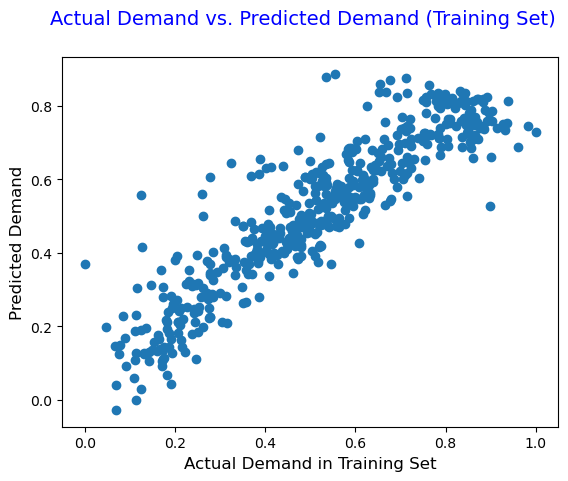

In [109]:
# Plot y_train and y_train_pred to review the spread of target variables in training data set

fig = plt.figure()
plt.scatter(y_train, y_train_pred)
fig.suptitle('Actual Demand vs. Predicted Demand (Training Set)', fontsize = 14, color='blue')               
plt.xlabel('Actual Demand in Training Set', fontsize = 12)                          
plt.ylabel('Predicted Demand', fontsize = 12)
plt.show()

In [110]:
# Observation from distribution plot of actual vs. predicted demands in training data set:
# There is a strong linear relationship between actual & predicted demands with a slope equal to 1
# It validates that the relationship between selected independent variables and target variable is linear

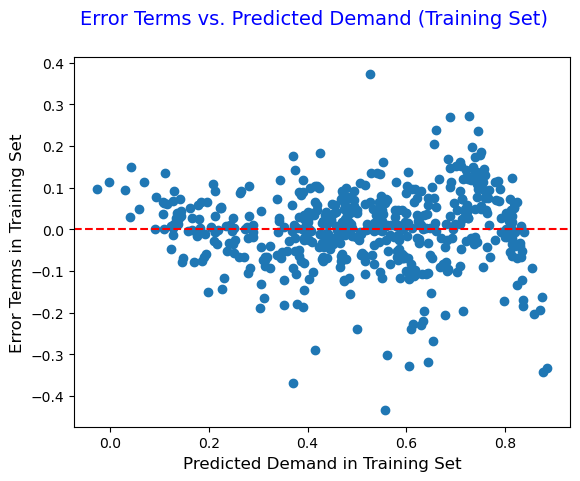

In [111]:
# Plot the Error Terms in training set against predicted target values to review their independency and homoscedasticity

# Visualise the Error Terms in Scatter Plot
fig = plt.figure()
plt.scatter(y_train_pred, (y_train - y_train_pred))
plt.axhline(y=0, color='r', linestyle='--')
fig.suptitle('Error Terms vs. Predicted Demand (Training Set)', fontsize = 14, color='blue')               
plt.xlabel('Predicted Demand in Training Set', fontsize = 12)                          
plt.ylabel('Error Terms in Training Set', fontsize = 12)
plt.show()

In [112]:
# Observations from the above plot:
# The above chart shows that the error terms are randomly distributed around y=0 horizontal line 
      # and there are no patterns among them. This validates that error terms are independent which is another assumption of linear model
# The above chart also shows that the error terms are somewhat uniformly distributed above and below the y=0 line indicating
    # that error terms have constant variance validating the homoscedasticity assumption of liner models

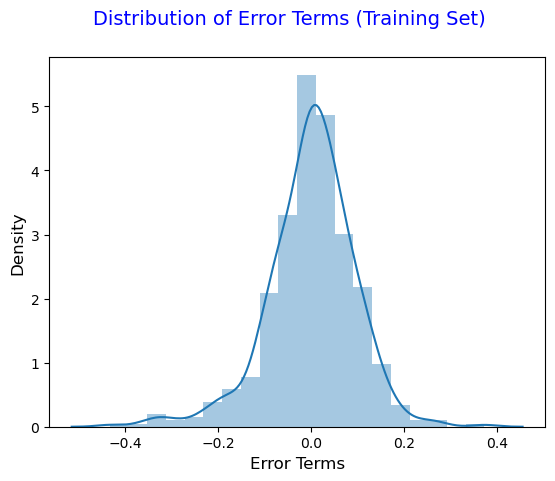

In [113]:
# Let's plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Distribution of Error Terms (Training Set)', fontsize = 14, color='blue')                   
plt.xlabel('Error Terms', fontsize = 12)
plt.ylabel('Density', fontsize = 12) 
plt.show()

In [114]:
# Observations from error terms distribution plot:
# The distribution is normal
# The mean for the distribution is zero
# Hence the model assumption related to error terms (residuals) is valid

#### 3.2 Perform Prediction and Evaluate Final Model

In [116]:
# It's time now to make predictions using test dataset

# Apply scaling on test set using scaler created on train dataset
df_test[rev_num_var] = scaler.transform(df_test[rev_num_var])

In [117]:
# Review the scaling done on test dataset
df_test.head()

,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,Cloudyday,Wetday,Spring,Summer,Winter,atemphumratio
184,0,0.545455,1,0.166667,0,0.831783,0.769660,0.575080,0.084219,0.692706,1.0,0.0,0.0,0.0,0.0,0.448463
535,1,0.454545,0,0.500000,1,0.901354,0.842587,0.516506,0.153728,0.712034,0.0,0.0,0.0,1.0,0.0,0.541072
299,0,0.818182,0,0.666667,1,0.511964,0.496145,0.798722,0.334206,0.303382,1.0,0.0,0.0,0.0,1.0,0.193380
221,0,0.636364,0,0.500000,1,0.881625,0.795343,0.301917,0.339570,0.547400,0.0,0.0,0.0,0.0,0.0,0.751766
152,0,0.454545,0,0.666667,1,0.817246,0.741471,0.149627,0.537414,0.569029,0.0,0.0,0.0,1.0,0.0,1.015081


In [118]:
# Divide the test dataset into X_test & y_test
y_test = df_test.pop('cnt')
X_test = df_test

# Keep only the final selected features in test dataset
X_test = X_test[sel_cols]

# Add a constant
X_test = sm.add_constant(X_test)

# Predict the target variable using final model
y_test_pred = demand_model_8.predict(X_test)

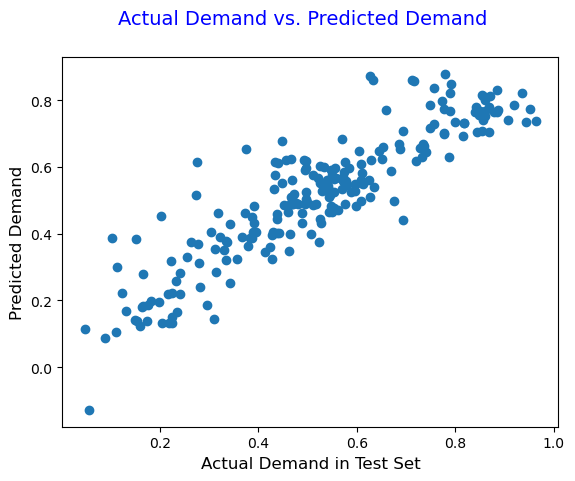

In [119]:
# Plot y_test and y_test_pred to review the spread of target variables

fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('Actual Demand vs. Predicted Demand', fontsize = 14, color='blue')               
plt.xlabel('Actual Demand in Test Set', fontsize = 12)                          
plt.ylabel('Predicted Demand', fontsize = 12)
plt.show()

In [120]:
# Observation from distribution plot of actual vs. predicted demands in test data set:
# There is a strong linear relationship between actual & predicted demands with a slope equal to 1
# It validates that the relationship between selected independent variables and target variable is linear

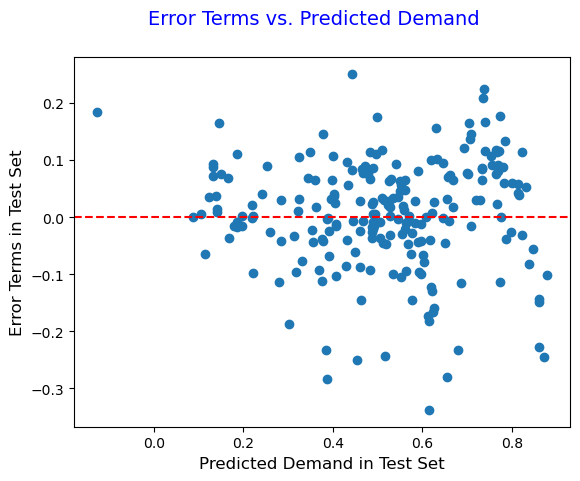

In [121]:
# Plot the Error Terms against predicted target values to review their independency and homoscedasticity

# Visualise the Error Terms in Scatter Plot
fig = plt.figure()
plt.scatter(y_test_pred, (y_test - y_test_pred))
# plt.plot(y_test_pred.iloc[:, 1], 0*y_test_pred.iloc[:, 1], 'r')
plt.axhline(y=0, color='r', linestyle='--')
fig.suptitle('Error Terms vs. Predicted Demand', fontsize = 14, color='blue')               
plt.xlabel('Predicted Demand in Test Set', fontsize = 12)                          
plt.ylabel('Error Terms in Test Set', fontsize = 12)
plt.show()

In [122]:
# Observations from the above plot:
# The above chart shows that the error terms are randomly distributed around y=0 horizontal line 
      # and there are no patterns among them. This validates that error terms are independent which is another assumption of linear model
# The above chart also shows that the error terms are somewhat uniformly distributed above and below the y=0 line indicating
    # that error terms have constant variance validating the homoscedasticity assumption of liner models

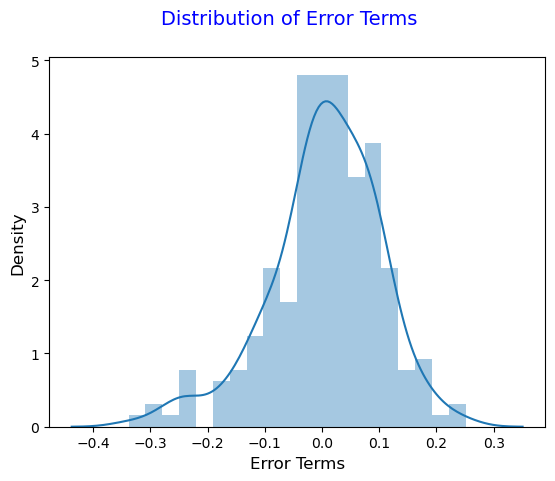

In [123]:
# Let's plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_test - y_test_pred), bins = 20)
fig.suptitle('Distribution of Error Terms', fontsize = 14, color='blue')                   
plt.xlabel('Error Terms', fontsize = 12)
plt.ylabel('Density', fontsize = 12) 
plt.show()

In [124]:
# Observations from error terms distribution plot:
# The distribution is normal
# The mean for the distribution is zero
# Hence the model assumption related to error terms (residuals) is valid

In [125]:
# Calculate the R-squared score on the test set

print("r2 Score for the test set: " + str(r2_score(y_test, y_test_pred)))

r2 Score for the test set: 0.8014591758694877


In [126]:
# Observation:
# Above plot shows a linear relationship between actual and predicted demands within test dataset
# This highlights that we have a very good model for the prediction of future bike demands
# The same is further proven by the high r2 score on the test dataset

#### 3.3 Explain Final Model for Business Use

Equation of our best fitted line is:

$ cnt = 0.268 + 0.235  \times  yr - 0.089  \times  holiday + 0.421 \times temp - 0.145 \times windspeed - 0.076 \times Cloudyday - 0.282 \times Wetday - 0.119 \times Spring + 0.047 \times Winter $


The above equation can be explained as follows:
* There are eight factors that determine the bike demands in the subject locality
* **Rental Year** - As the year progresses, bike demand is expected to rise, because of increased awareness about the facility among the users
* **Holiday** - On holidays, demand is expected to fall slightly
* **Temperature** - As the temperature increases (in otherwise cold climate), bike demand will grow significantly
* **Wind Speed** - On days with high wind speed, demand is expected to fall
* **Cloudyday/ Wetday** - Demand will be less compared to Clearday on days with heavy cloud or light rain/ snow.
* **Spring/ Winter** - Demand will fall slightly in Spring & Winter compared to Summer or Fall

##### Assumptions:

One has to forecast the factors like temperature, wind speed, cloudy or rainy day etc. for future days, in order to plug-in those data into this model to predict the bike rental demands.